# Сегментация отточных клиентов банка "Метанпромбанк"

## Материалы
[Презентация]( https://drive.google.com/file/d/1RcQZiZo3s7gzhEVVQqO87nwqmLwvOldV/view?usp=sharing )

[ Дашборд]( https://public.tableau.com/views/_16986630223810/sheet1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link )


### Описание данных

Датасет содержит данные о клиентах банка «Метанпром». 

Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:
- USERID — идентификатор пользователя
- score - баллы кредитного скоринга
- city - город
- gender - пол
- age - возраст
- equity - количество баллов собственности
- balance - баланс на счете
- products - количество продуктов, которыми пользуется клиент
- credit_card - есть ли кредитная карта
- last_activity - активный клиент
- EST_SALARY - оценочный доход клиента
- churn - признак оттока

### Цели исследования

- определить признаки отточности клиентов 
- сформировать сегменты клиентов, склонных уходить из банка 
- дать рекомендации отделу маркетинга в зависимости от клиентов в сегменте, какие действия могли бы удержать/вернуть этих клиентов в банк 

### Ход исследования


- [Шаг 1. Загрузка данных и обзор данных](#1)


- [Шаг 2. Предобработка данных](#2)
    - [2.1 изменение заголовков столбцов](#2.1)
    - [2.2 проверка пропусков](#2.2)
    - [2.3 проверка дубликатов](#2.3)
    - [2.4 создание новых столбцов](#2.4)
      - [пропуски в balance](#2.4.1)
      - [по городам](#2.4.2)
      - [по полу](#2.4.3)  
    - [2.5 обработка пропусков](#2.5)
    - [2.6 удаление аномальных данных](#2.6)
      
    
- [Шаг 3. Исследовательский анализ](#3)
    - [3.1 Исследование связи характеристик пользователя и оттока](#3.1)
      - [3.1.1 Портреты типичных пользователей](#3.1.1)
      - [3.1.2 Корреляционный анализ](#3.1.2)
        - [матрица рассеяния](#3.1.2.1)
        - [матрицы корреляции: коэффициент Пирсона, коэффициент PhiK](#3.1.2.2)
    - [3.2 Определение значениий/интервалов для отточных характеристик](#3.2)
      - [3.2.1 Гистограммы для непрерывных переменных и переменных с большим числом уникальных значений](#3.2.1)
      - [3.2.2 Сводные таблицы для категориальных значений](#3.2.2)
   - [3.3 Проверка важности признаков модели с деревьями решений](#3.3)
   
    
- [Шаг 4. Проверка статистических гипотез](#4)
    - [4.1 Различаются ли доходы клиентов, которые ушли и которые остались (t-тест для сравнения средних двух генеральных совокупностей)](#4.1)
      - [t-тест для сравнения средних двух генеральных совокупностей](#4.1.1)
      - [u-тест для сравнения средних двух генеральных совокупностей](#4.1.2)
      - [сравнение результатов t-test и u-test](#4.1.3)
    - [4.2 Проверка статистической разницы долей z-критерием ](#4.2)
    - [4.3 тест хи-квадрат на независимость переменных](#4.3)   
 
- [Шаг 5. Сегментация пользователей](#5)
 
- [Шаг 6. Выводы, рекомендации](#6) 

- [Шаг 7. Презентация менеджеру отдела маркетинга](#7) 

## Шаг 1. Загрузка данных и обзор данных <a id='1'></a>

Загрузка сторонней библиотеки для корреляционного анализа с коэффициентом PhiK

In [1]:
pip install phik -q

DEPRECATION: ipykernel 6.0.1 has a non-standard dependency specifier matplotlib-inline<0.2.0appnope,>=0.1.0; platform_system == "Darwin". pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of ipykernel or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import datetime as dt
import os

import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objects as go

import scipy.stats as stats
import numpy as np
import random
import math as mth
import phik

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree


from IPython.display import display
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#функция для загрузки данных
def load_csv_by_filename(file_name):
    'Загрузка файла по имени, с проверкой ошибок'
    file_path = f'datasets/{file_name}.csv'
    
    if os.path.isfile( file_path): 
        data = pd.read_csv(file_path)  
        print('The file is present.')
    else:
        print('The file is loaded from server.')
        
    return data

In [4]:
file_name = 'bank_scrooge'
data = load_csv_by_filename(file_name)

The file is present.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Заголовки требуют изменения(сделать строчными), пропуски в age и balance

## Шаг 2. Предобработка данных <a id='2'></a>

### 2.1 изменение заголовков столбцов <a id='2.1'></a>

In [6]:
# rename Pandas columns to lower case
data.columns= data.columns.str.lower()
data.head()

userid  score       city gender   age  equity    balance  products  \
0  183012 850.00    Рыбинск      Ж 25.00       1   59214.82         2   
1  146556 861.00    Рыбинск      Ж 37.00       5  850594.33         3   
2  120722 892.00    Рыбинск      Ж 30.00       0        NaN         1   
3  225363 866.00  Ярославль      Ж 51.00       5 1524746.26         2   
4  157978 730.00  Ярославль      М 34.00       5     174.00         1   

   credit_card  last_activity  est_salary  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

### 2.2 проверка пропусков <a id='2.2'></a>

In [7]:
#посмотрим процент пропусков в столбцах
pd.DataFrame(round(data.isna().mean()*100, 2).sort_values(ascending=False)).style.background_gradient('coolwarm',low=0.75, high=1.0)

Пропусков в age меньше 0.5% (0.26%), удалим строки с пропусками в возрасте.

In [8]:
data.dropna(subset=['age'],inplace=True)
data = data.reset_index(drop=True)
#проверка
print(data.shape)
data.tail()

(9974, 12)


userid  score       city gender   age  equity    balance  products  \
9969  120553 814.00    Рыбинск      М 27.00       1   78144.65         1   
9970  139170 894.00  Ярославль      М 46.00       0        NaN         1   
9971  115639 903.00  Ярославль      М 24.00       0        NaN         2   
9972  148700 777.00  Ярославль      Ж 68.00       3  865457.97         3   
9973   96267 828.00    Рыбинск      Ж 58.00       3 1180886.70         4   

      credit_card  last_activity  est_salary  churn  
9969            0              1    18943.64      0  
9970            1              0   196898.29      0  
9971            1              1   108905.09      0  
9972            0              1    86874.90      0  
9973            0              1    21422.37      0

Пропуски в balance требуют исследования, см. пункт 2.6

### 2.3 проверка дубликатов <a id='2.3'></a>

In [9]:
# подсчёт количества дубликатов
data.duplicated().sum()

0

Явных дубликатов нет в данных

### 2.4 создание новых столбцов <a id='2.4'></a>

#### пропуски в balance <a id='2.4.1'></a>

Создадим столбец, который показывает, что есть пропуск в столбце balance

In [10]:
data['nan_balance'] = data.balance.apply(lambda x: 1 if mth.isnan(x) else 0)
data.tail()

userid  score       city gender   age  equity    balance  products  \
9969  120553 814.00    Рыбинск      М 27.00       1   78144.65         1   
9970  139170 894.00  Ярославль      М 46.00       0        NaN         1   
9971  115639 903.00  Ярославль      М 24.00       0        NaN         2   
9972  148700 777.00  Ярославль      Ж 68.00       3  865457.97         3   
9973   96267 828.00    Рыбинск      Ж 58.00       3 1180886.70         4   

      credit_card  last_activity  est_salary  churn  nan_balance  
9969            0              1    18943.64      0            0  
9970            1              0   196898.29      0            1  
9971            1              1   108905.09      0            1  
9972            0              1    86874.90      0            0  
9973            0              1    21422.37      0            0

#### по городам <a id='2.4.2'></a>

город в бинарном виде - 3 новых столбца - OneHotEncoding - 
#pd.get_dummies(df_dum, columns = ['City'], prefix = '', prefix_sep = '')  

In [11]:
# сделаем копию столбца city, чтобы остался столбец после преобразования
data['city_copy'] = data['city']
# one-hot кодирование
data = pd.get_dummies(data, columns = ['city_copy'], prefix = '', prefix_sep = '') 
data.tail()

userid  score       city gender   age  equity    balance  products  \
9969  120553 814.00    Рыбинск      М 27.00       1   78144.65         1   
9970  139170 894.00  Ярославль      М 46.00       0        NaN         1   
9971  115639 903.00  Ярославль      М 24.00       0        NaN         2   
9972  148700 777.00  Ярославль      Ж 68.00       3  865457.97         3   
9973   96267 828.00    Рыбинск      Ж 58.00       3 1180886.70         4   

      credit_card  last_activity  est_salary  churn  nan_balance  Ростов  \
9969            0              1    18943.64      0            0       0   
9970            1              0   196898.29      0            1       0   
9971            1              1   108905.09      0            1       0   
9972            0              1    86874.90      0            0       0   
9973            0              1    21422.37      0            0       0   

      Рыбинск  Ярославль  
9969        1          0  
9970        0          1  
9971        0          1  
9972        0          1  
9973        1          0

#### по полу <a id='2.4.3'></a>

In [12]:
data['gender_copy'] = data['gender']
data = pd.get_dummies(data, columns = ['gender_copy'], prefix = '', prefix_sep = '') 
#переименуем столбцы
data.rename(columns={"Ж": "female", "М": "male"}, inplace=True)
data.drop(columns={ "female"}, inplace=True)
data.tail()

userid  score       city gender   age  equity    balance  products  \
9969  120553 814.00    Рыбинск      М 27.00       1   78144.65         1   
9970  139170 894.00  Ярославль      М 46.00       0        NaN         1   
9971  115639 903.00  Ярославль      М 24.00       0        NaN         2   
9972  148700 777.00  Ярославль      Ж 68.00       3  865457.97         3   
9973   96267 828.00    Рыбинск      Ж 58.00       3 1180886.70         4   

      credit_card  last_activity  est_salary  churn  nan_balance  Ростов  \
9969            0              1    18943.64      0            0       0   
9970            1              0   196898.29      0            1       0   
9971            1              1   108905.09      0            1       0   
9972            0              1    86874.90      0            0       0   
9973            0              1    21422.37      0            0       0   

      Рыбинск  Ярославль  male  
9969        1          0     1  
9970        0          1     1  
9971        0          1     1  
9972        0          1     0  
9973        1          0     0

### 2.5 обработка пропусков <a id='2.5'></a>

    - 2.3 обработка пропусков -проверка, удаление строк с пропусками(<1%), заполнение 
       - 'balance'  
          - связь пропусков и данных - написать функцию* (проверка зависимости пропуск/не пропуск(новый столбец) и другие параметры  )
              - связь есть - заполнить в зависимости от категорий, связанного параметра
              - связи нет - медианой заполнить или отдельная категория
              * - какой метод проверки использовать?  

In [13]:
def percentage_difference(data, key_parameter, сompared_parameters_list):
    """Функция рассчитывает 
        - процентную разницу, 
        - среднее значение для данных ключевого параметра, ключевой параметр = 1, 
        - среднее занчение, где данные ключевого параметра = 0
        
      Возвращает сортированный список кортежей
       [(сравниваемый_параметр_1, [процентная разница, 
                                   среднее сравниваемого_параметра_1 на данных, где key_parameter=1,
                                   среднее сравниваемого_параметра_1  на данных, где key_parameter=0]),
        (сравниваемый_параметр_2, [процентная разница, 
                                   среднее сравниваемого_параметра_2 на данных, где key_parameter=1,
                                   среднее сравниваемого_параметра_2 на данных, где key_parameter=0]),
                                   ]
    """ 
    key_data = data[data[key_parameter] == 1]
    not_key_data = data[data[key_parameter] == 0]
    percentage_difference_dict = {}
    '''
    for parameter in сompared_parameters_list:
        key_mean = key_data[parameter].mean()
        not_key_mean = not_key_data[parameter].mean()
        diff_means = not_key_mean - key_mean
        avg_means = (not_key_mean + key_mean) / 2
        percentage_difference = (diff_means / avg_means) * 100
        percentage_difference_dict[parameter] = [round(percentage_difference,2), round(key_mean,2), round(not_key_mean,2)]
    '''
    index_list=[]
    column_list=[]
    for parameter in сompared_parameters_list:
        key_mean = key_data[parameter].mean()
        not_key_mean = not_key_data[parameter].mean()
        percentage_difference = (not_key_mean/key_mean - 1) *100
        
        index_list.append(parameter)
        column_list.append(round(percentage_difference,2))
        
        percentage_difference_dict[parameter] = [round(percentage_difference,2), round(key_mean,2), round(not_key_mean,2)]
        
    dict_data = {'index': index_list, 'churn': column_list }
    df = pd.DataFrame.from_dict(dict_data).set_index('index')


    return sorted(percentage_difference_dict.items(), key=lambda x:abs(x[1][0]), reverse=True), df

In [14]:
test_columns = ['score',  'age', 'equity', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn', 'Ростов', 'Рыбинск', 'Ярославль', 'male']
percentage_diff_nan_list,_ = percentage_difference(data,'nan_balance',test_columns)
percentage_diff_nan_list

[('equity', [6512.61, 0.05, 3.39]),
 ('churn', [4014.43, 0.01, 0.23]),
 ('products', [78.92, 1.16, 2.08]),
 ('Ростов', [48.84, 0.1, 0.15]),
 ('est_salary', [-44.99, 226345.42, 124520.39]),
 ('credit_card', [-21.48, 0.82, 0.64]),
 ('male', [-13.41, 0.56, 0.48]),
 ('Ярославль', [-10.28, 0.64, 0.57]),
 ('last_activity', [-6.15, 0.55, 0.52]),
 ('Рыбинск', [5.98, 0.26, 0.27]),
 ('score', [-2.5, 865.36, 843.74]),
 ('age', [1.98, 42.09, 42.92])]

In [15]:
data.equity.value_counts()

0    2576
5    1915
4    1847
3    1541
2    1051
1     773
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

У данных с пропущенными значениями в балансе, есть очень сильная связь с количеством собственности и оттоком. Мало собственности - (0,1) и оттока практически нет.
Можно отнести пропуски к типк MNAR (Missing Not At Random / Отсутствует не случайно) — пропуски зависят от переменных, которых нет в данных, объяснить взаимосвязи с данными не получается, без дополнительного обоснования их нельзя отбрасывать или заполнять одним значением, т.к. это приведёт к заметным искажениям.

Так же есть связь c зарплатой. 

In [16]:
data.query('nan_balance==1').equity.value_counts()

0    2164
1     114
3       1
Name: equity, dtype: int64

In [17]:
data.query('nan_balance==1').est_salary.describe()

count      2279.00
mean     226345.42
std      199825.59
min       20274.03
25%      120217.39
50%      174347.87
75%      240372.78
max     1333687.36
Name: est_salary, dtype: float64

<AxesSubplot:>

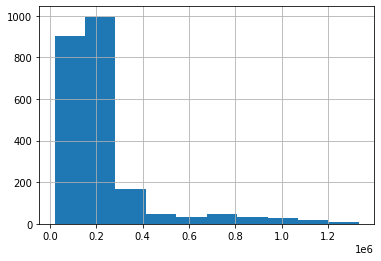

In [18]:
data.query('nan_balance==1').est_salary.hist()


Интересное сочетание высоких зарплат и отсутствия собственности у клиентов с пропущенным балансом

In [19]:
similar_clients  = data.query('churn== 0 and equity == 0  and nan_balance==0')
similar_clients.head()

userid  score       city gender   age  equity   balance  products  \
84   221446 785.00    Рыбинск      Ж 32.00       0  35867.00         1   
213  141896 845.00     Ростов      Ж 41.00       0 179615.20         2   
273  144352 977.00     Ростов      Ж 36.00       0  26312.31         1   
328  213071 785.00  Ярославль      М 31.00       0 114718.19         1   
343  147612 814.00  Ярославль      Ж 61.00       0  97174.81         2   

     credit_card  last_activity  est_salary  churn  nan_balance  Ростов  \
84             1              0   140486.76      0            0       0   
213            0              0   196600.10      0            0       1   
273            1              1   140598.20      0            0       1   
328            1              1    67726.52      0            0       0   
343            1              0   108413.26      0            0       0   

     Рыбинск  Ярославль  male  
84         1          0     0  
213        0          0     0  
273        0          0     0  
328        0          1     1  
343        0          1     0

In [20]:
similar_clients.est_salary.describe()

count      334.00
mean    110929.03
std      63710.72
min       7054.82
25%      64331.69
50%     100659.42
75%     146633.45
max     506011.98
Name: est_salary, dtype: float64

<AxesSubplot:>

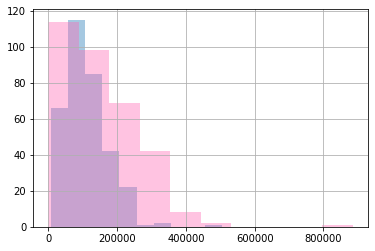

In [21]:
ax = similar_clients.est_salary.hist(alpha=0.4)
similar_clients.balance.hist(ax=ax, color='hotpink',alpha=0.4)

Средние зарплаты для похожих клиентов по equity и оттоку сильно отличаются, от средних зарплат клиентов с пропущенными значениями. Насколько корректно брать медианы по балансу  на основе совпадения категорий по зарплате?

In [22]:
data.est_salary.describe()

count      9974.00
mean     147786.81
std      139285.51
min        2546.30
25%       75251.66
50%      119626.79
75%      174499.81
max     1395064.45
Name: est_salary, dtype: float64

<AxesSubplot:>

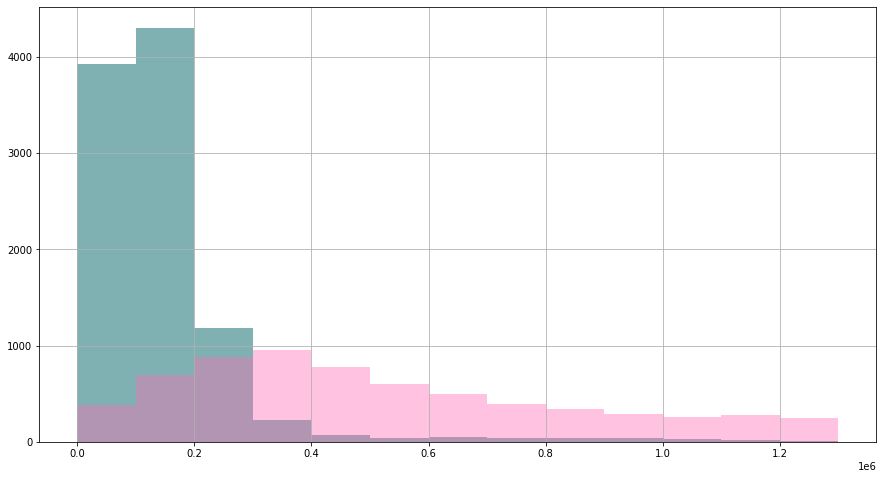

In [23]:
plt.figure(figsize=(15,8))
ax = data.est_salary.hist(alpha=0.8, color='cadetblue',bins=np.arange(0, data.est_salary.max()+1, 100000, dtype=float))
data.balance.hist(ax=ax, color='hotpink',alpha=0.4, bins=np.arange(0, data.est_salary.max()+1, 100000, dtype=float))

In [24]:
similar_clients  = data.query('churn== 0 and nan_balance==0')
similar_clients.head()

userid  score       city gender   age  equity    balance  products  \
1  146556 861.00    Рыбинск      Ж 37.00       5  850594.33         3   
5  202305 856.00    Рыбинск      М 56.00       4  863687.24         3   
6  177259 807.00  Ярославль      Ж 39.00       3  405042.44         3   
7  218868 825.00  Ярославль      Ж 38.00       4  458145.40         2   
8  211686 923.00  Ярославль      М 54.00       5 1206337.87         2   

   credit_card  last_activity  est_salary  churn  nan_balance  Ростов  \
1            1              0    86621.77      0            0       0   
5            1              0   156619.80      0            0       0   
6            0              1   103838.32      0            0       0   
7            1              1    68085.48      0            0       0   
8            1              0   155371.79      0            0       0   

   Рыбинск  Ярославль  male  
1        1          0     0  
5        1          0     1  
6        0          1     0  
7        0          1     0  
8        0          1     1

In [25]:
similar_clients.est_salary.describe()

count      5889.00
mean     117599.73
std       98268.24
min        2546.30
25%       63091.83
50%      100654.39
75%      147298.04
max     1395064.45
Name: est_salary, dtype: float64

In [26]:
np.percentile(data.est_salary,100/(10*2))

32080.855000000003

In [27]:
num_groups = 10
list_category_bondaries = [int(np.percentile(data.est_salary,(100/num_groups)*i)) for i in range(num_groups)]
print(list_category_bondaries)
list_labels = [f'{list_category_bondaries[i]} min group {i}' for i in range(num_groups) ]
print(list_labels)
list_category_bondaries.append(int(data.est_salary.max()+1))
list_category_bondaries[0] = 0

[2546, 45371, 66370, 83906, 101297, 119626, 139274, 161568, 189202, 242286]
['2546 min group 0', '45371 min group 1', '66370 min group 2', '83906 min group 3', '101297 min group 4', '119626 min group 5', '139274 min group 6', '161568 min group 7', '189202 min group 8', '242286 min group 9']


In [28]:
list_category_bondaries

[0,
 45371,
 66370,
 83906,
 101297,
 119626,
 139274,
 161568,
 189202,
 242286,
 1395065]

In [29]:
# по зарплате сделать группы
data["salary_category"] = pd.cut(
    x=data.est_salary,
    bins=list_category_bondaries,
    labels=list_labels
)

In [30]:
### КОД РЕВЬЮЕРА
old_balance = data.balance.copy()

In [31]:
data.head()

userid  score       city gender   age  equity    balance  products  \
0  183012 850.00    Рыбинск      Ж 25.00       1   59214.82         2   
1  146556 861.00    Рыбинск      Ж 37.00       5  850594.33         3   
2  120722 892.00    Рыбинск      Ж 30.00       0        NaN         1   
3  225363 866.00  Ярославль      Ж 51.00       5 1524746.26         2   
4  157978 730.00  Ярославль      М 34.00       5     174.00         1   

   credit_card  last_activity  est_salary  churn  nan_balance  Ростов  \
0            0              1    75719.14      1            0       0   
1            1              0    86621.77      0            0       0   
2            1              1   107683.34      0            1       0   
3            0              1   174423.53      1            0       0   
4            1              0    67353.16      1            0       0   

   Рыбинск  Ярославль  male     salary_category  
0        1          0     0   66370 min group 2  
1        1          0     0   83906 min group 3  
2        1          0     0  101297 min group 4  
3        0          1     0  161568 min group 7  
4        0          1     1   66370 min group 2

In [32]:
data.groupby(['salary_category'],as_index=False)['balance'].median()

salary_category    balance
0    2546 min group 0  338108.48
1   45371 min group 1  425306.23
2   66370 min group 2  451394.53
3   83906 min group 3  516811.20
4  101297 min group 4  533984.77
5  119626 min group 5  561133.35
6  139274 min group 6  601406.57
7  161568 min group 7  651048.62
8  189202 min group 8  857988.59
9  242286 min group 9 1669430.48

In [33]:
data.query('churn == 0').groupby(['salary_category'],as_index=False)['balance'].median()

salary_category    balance
0    2546 min group 0  336128.39
1   45371 min group 1  416929.90
2   66370 min group 2  434087.71
3   83906 min group 3  486931.58
4  101297 min group 4  491708.72
5  119626 min group 5  491244.81
6  139274 min group 6  528614.22
7  161568 min group 7  569456.30
8  189202 min group 8  666917.76
9  242286 min group 9 1367580.31

In [34]:
filtered_data = data.query('churn == 0')

def random_balance_from_category(data, category_column, category, nan_column ):
    """ Функция для заполнения столбца (nan_column) рандомным значением, 
        на основе значения этого столбца (nan_column) 
        в категории(category) из другого столбца (category_column)
        Возвращает - рандомное значение для столбца nan_column 
    """
    series_category = data.loc[(data[category_column] == category), nan_column]
    left_limit = np.nanpercentile(series_category, 40)
    right_limit = np.nanpercentile(series_category, 60)
    nan_column_value = random.uniform(left_limit, right_limit)
    return nan_column_value 

# перебираем каждую категорию по зарплате
for s in data['salary_category'].unique():
    
    # на каждом шаге цикла с помощью атрибута loc выбираем строки,
    # в которых в 'salary_category' текущая категория зарплаты (s) и есть пропуски в balance
    data.loc[(data['salary_category']== s) & (data['balance'].isna()), 'balance'] = \
    data.loc[(data['salary_category']== s) & (data['balance'].isna()), 'balance'].apply(lambda x: random_balance_from_category(filtered_data, 'salary_category', s, 'balance' ))
    #filtered_data.loc[(filtered_data['salary_category'] == s), 'balance'].median()
    # и записываем в них медианное значение balance среди строк с текущей категорией по зарплате (s)

# проверяем, что все пропуски заполнены
print(data['balance'].isna().sum())

0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   userid           9974 non-null   int64   
 1   score            9974 non-null   float64 
 2   city             9974 non-null   object  
 3   gender           9974 non-null   object  
 4   age              9974 non-null   float64 
 5   equity           9974 non-null   int64   
 6   balance          9974 non-null   float64 
 7   products         9974 non-null   int64   
 8   credit_card      9974 non-null   int64   
 9   last_activity    9974 non-null   int64   
 10  est_salary       9974 non-null   float64 
 11  churn            9974 non-null   int64   
 12  nan_balance      9974 non-null   int64   
 13  Ростов           9974 non-null   uint8   
 14  Рыбинск          9974 non-null   uint8   
 15  Ярославль        9974 non-null   uint8   
 16  male             9974 non-null   uint8   


### 2.6 удаление аномальных данных <a id='2.6'></a>

Удалим аномальных данных (percentile 99) 
     - ~~age~~
     - 'balance'
     - 'salary'  

In [37]:
max_salary = np.percentile(data.est_salary, 99)
data = data.query('est_salary < @max_salary')
data.shape

(9874, 18)

In [38]:
max_balance = np.percentile(data.balance, 99)
data = data.query('balance < @max_balance')
data.shape

(9775, 18)

In [39]:
### КОД РЕВЬЮЕРА
data.products.min()

0

In [40]:
data = data.query('products > 0')
data.shape

(9774, 18)

## Шаг 3. Исследовательский анализ <a id='3'></a>

### 3.1 Исследование связи характеристик пользователя и оттока <a id='3.1'></a>

категориальные характеристики(бинарные)
- город 1, город 2, город 3
- пол
- credit_card
- last_activity

категориальные множественные
- equity
- products

непрерывные
- score
- age
- salary
- balance

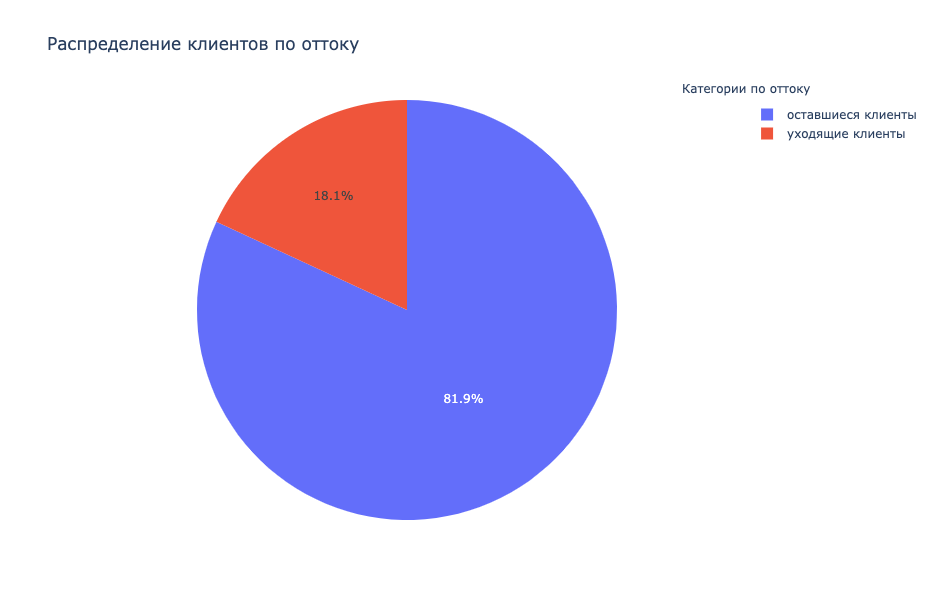

In [41]:
#сколько всего отточных

labels =['оставшиеся клиенты ','уходящие клиенты']
churn_data = data.churn.value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=churn_data.values)])

fig.update_layout(title='Распределение клиентов по оттоку', 
                  width=800, 
                  height=600,
                  annotations=[dict(x=1.12, 
                                    y=1.05,
                                    text='Категории по оттоку',
                                    showarrow=False)])

#### 3.1.1 Портреты типичных пользователей <a id='3.1.1'></a>

Отдельно сравним поведение оточных и оставшихся клиентов

##### Сравнение портретов отточного/оставшегося

In [42]:
test_columns = ['score',  'age', 'male','equity', 'products', 'credit_card', 'last_activity', 'est_salary', 'balance','Ростов', 'Рыбинск', 'Ярославль']
portrait_diff_list, df= percentage_difference(data,'churn',test_columns)
portrait_diff_list

[('equity', [-36.58, 3.75, 2.38]),
 ('last_activity', [-30.97, 0.7, 0.48]),
 ('balance', [-30.39, 943962.42, 657068.97]),
 ('male', [-28.21, 0.65, 0.47]),
 ('credit_card', [28.19, 0.55, 0.71]),
 ('products', [-25.97, 2.37, 1.76]),
 ('Рыбинск', [15.3, 0.24, 0.28]),
 ('Ярославль', [-5.3, 0.61, 0.58]),
 ('age', [3.92, 41.39, 43.01]),
 ('Ростов', [-3.17, 0.15, 0.14]),
 ('score', [-1.94, 861.09, 844.43]),
 ('est_salary', [-0.48, 136518.78, 135856.74])]

In [43]:
portraits_color = pd.DataFrame(abs(round(df,2)).sort_values(by='churn',ascending=False)).style.background_gradient('coolwarm',low=0.75, high=1.0).format('{:,.2f}')
portraits_color

**Выводы:**
Отличия отточных клиентов

- в среднем больше собственности (почти 4 балла в среднем)
- у отточных активизируется активность перед уходом
- больше баланс на счету (заполнение пропусков очень сильно повлияло и удаление аномалий!!!!)
- мужчины чаще уходят
- реже есть кредитная карта
- больше используемых продуктов (больше 2.4 в среднем)
- реже из Рыбинска

Возраст, кредитный рейтинг, зарплата и проживание в  Ростове или Ярославле влияют в меньшей степени на вероятность оттока

#### 3.1.2 Корреляционный анализ <a id='3.1.2'></a>

##### матрица рассеяния <a id='3.1.2.1'></a>

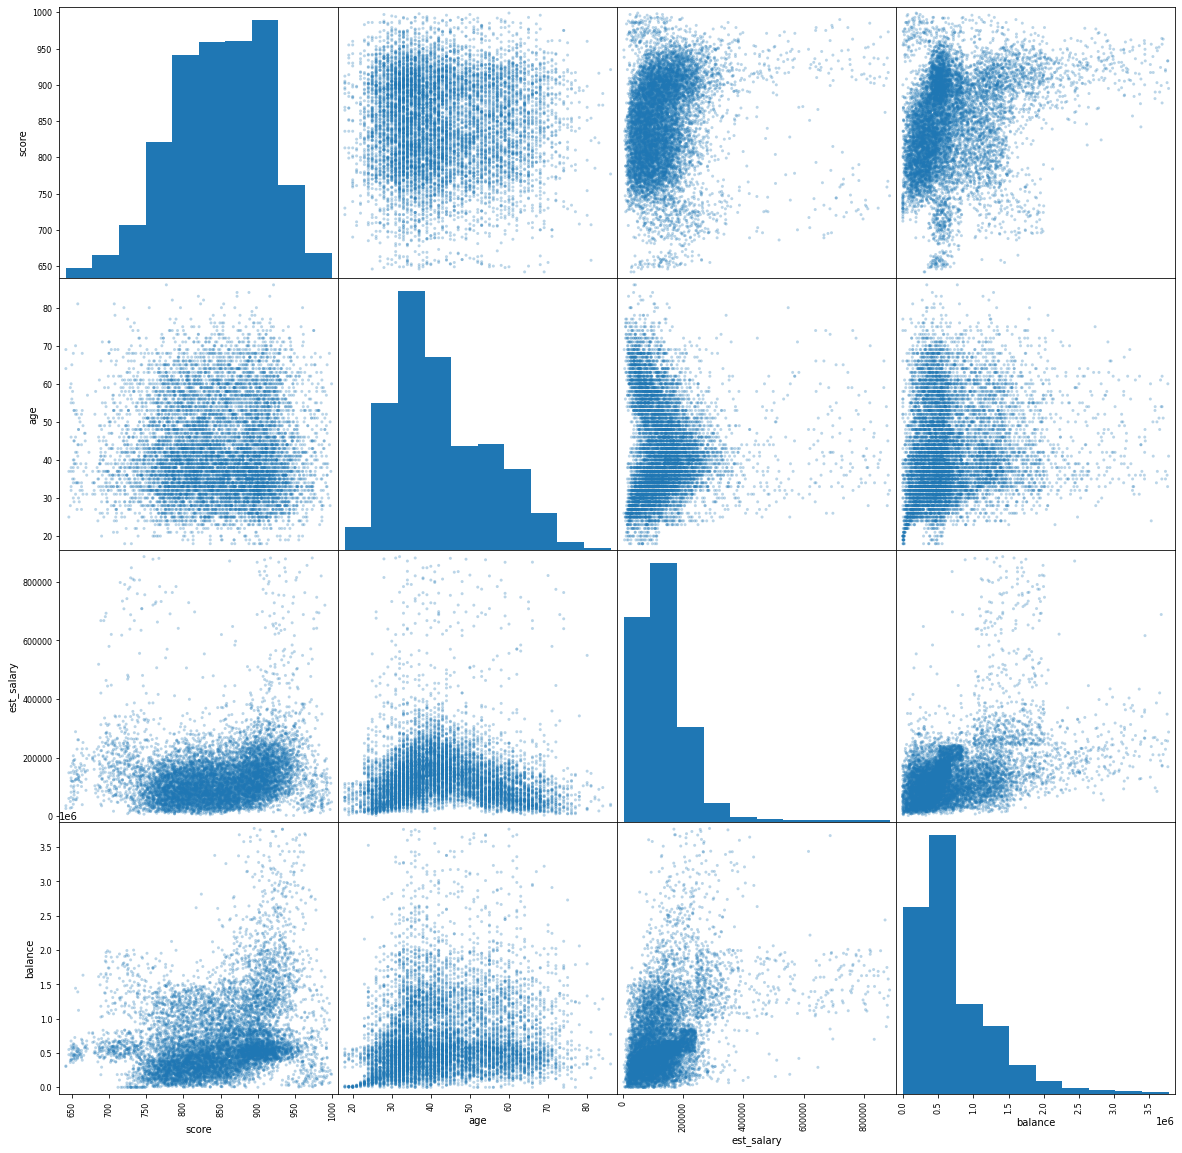

In [44]:
#матрица рассеяния
continuous_columns = ['score',  'age', 'est_salary', 'balance']
discrete_columns = ['equity', 'products', 'credit_card', 'last_activity',  'Ростов', 'Рыбинск', 'Ярославль', 'male', 'churn']
pd.plotting.scatter_matrix(data[continuous_columns], alpha=0.3, figsize=(20, 20));

Заполнение пропусков в балансе заметно на графиках рассеяния. Видна связь между балансом и score, , балансом и зарплатой.

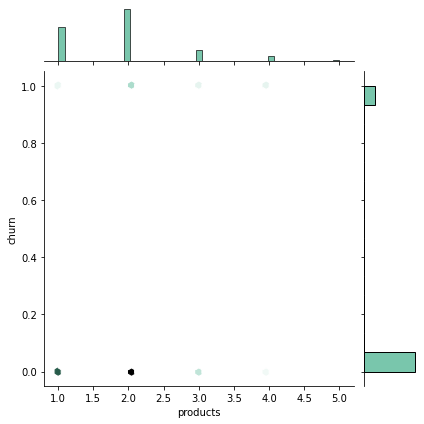

In [45]:
sns.jointplot(data=data, x='products', y='churn', kind="hex", color="#4CB391");

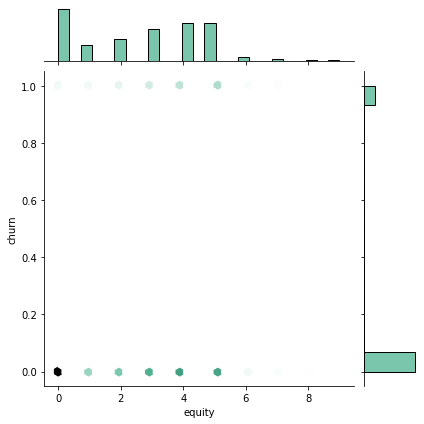

In [46]:
sns.jointplot(data=data, x='equity', y='churn', kind="hex", color="#4CB391");

Баллов собственности больше 5 редко встречаются. Для неотточных более характерно 0 баллов собственности, для отточных виден рост количества клиентов с ростом баллов собственности.

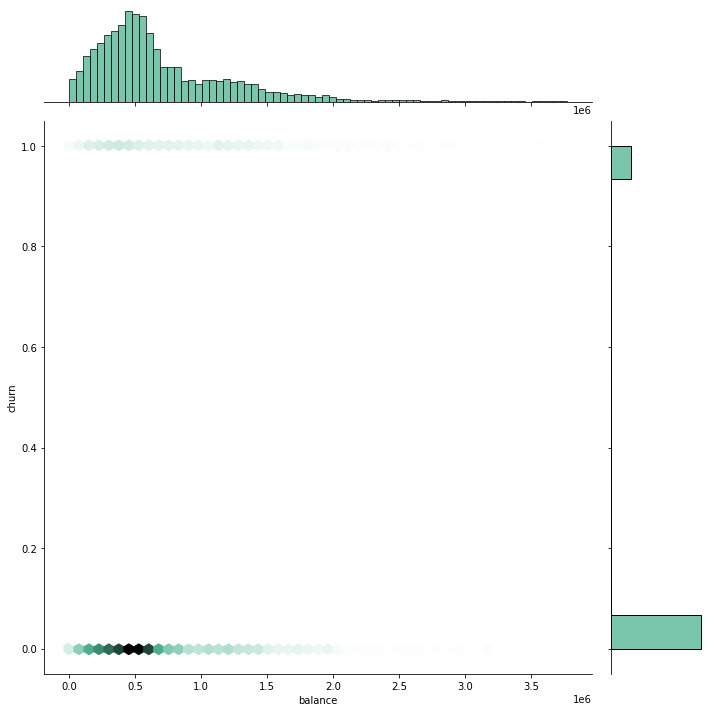

In [47]:
sns.jointplot(data=data, x='balance', y='churn', kind="hex", color="#4CB391", height=10);

Для неотточных заметна повыщенная концентрация клиентов в районе баланса 500 тысяч

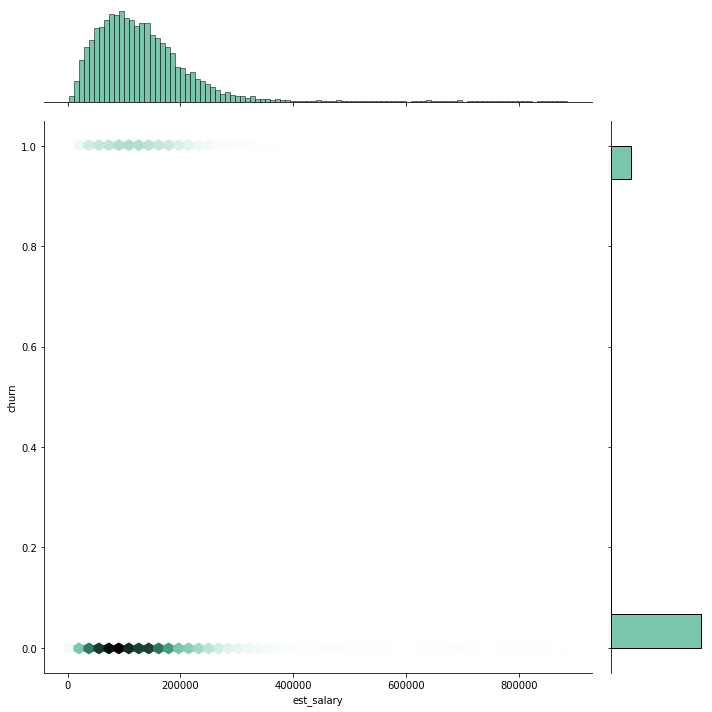

In [48]:
sns.jointplot(data=data, x='est_salary', y='churn', kind="hex", color="#4CB391", height=10);

##### матрицы корреляции: коэффициент Пирсона, коэффициент PhiK <a id='3.1.2.2'></a>

Шкала Чеддока - 0 – полное отсутствие связи; 0 – 0.3 – очень слабая; 0.3 – 0.5 – слабая; 0.5 – 0.7 – средняя; 0.7 – 0.9 – высокая; 0.9 – 1 – очень высокая.

##### коэффициент Пирсона

In [49]:
continuous_columns = ['score',  'age', 'est_salary', 'balance']
discrete_columns = ['equity', 'products', 'credit_card', 'last_activity',  'Ростов', 'Рыбинск', 'Ярославль', 'male','churn']
all_columns = continuous_columns+discrete_columns
#матрица корреляции для непрерывных характеристик и оттока
corr_pirson_color = ( 
pd.DataFrame(abs(round(data[all_columns]
                   .corr()['churn'],2))
                   .sort_values(ascending=False)[1:])
   .style.background_gradient('coolwarm',low=0.75, high=1.0)
   .format('{:,.2f}')
)
corr_pirson_color

Есть очень слабая связь(по шкале Чеддока) с оттока и баланса(0.18). Практически нет связи с score, age и est_salary.

Слабая связь с products, очень слабая связь equity, last_activity и credit_card. Пол клиента как женский, так и мужской одинаково влияют на отток, есть связь. Город практичесвки не оказывает влияния.

##### коэффициент PhiK

In [50]:
test_columns = ['equity', 'products', 'credit_card', 'last_activity',  'Ростов', 'Рыбинск', 'Ярославль', 'male', 'score',  'age', 'est_salary', 'balance','churn',]
corr_phiK_color = (pd.DataFrame(abs(round(data[test_columns].phik_matrix()['churn'],2))
                               .sort_values(ascending=False)[1:])
                               .style.background_gradient('coolwarm',low=0.75, high=1.0)
                               .format('{:,.2f}')
                  )
corr_phiK_color

interval columns not set, guessing: ['equity', 'products', 'credit_card', 'last_activity', 'Ростов', 'Рыбинск', 'Ярославль', 'male', 'score', 'age', 'est_salary', 'balance', 'churn']


Коэффициент PhiK уловил связь со score и age. Кредитная карта оказывает меньше влияния, чем score, и чуть лучше, чем возраст. Города не влияют

### 3.2 Определение значениий/интервалов для отточных характеристик <a id='3.2'></a>

#### 3.2.1 Гистограммы для непрерывных переменных и переменных с большим числом уникальных значений <a id='3.2.1'></a>

После корреляционного анализа из интересных непрерывных характеристик остались - balance, score, age
Причем у score и age какая-то нелинейная связь с оттоком, определилась только коэффициентом PhiK.

In [51]:
def plot_density_hist_churn(data, column_name, discrete = False):
    data_churn = data.query('churn == 1')
    data_not_churn = data.query('churn == 0')
    plt.figure(figsize=(15,8))
    plt.rcParams.update({'font.size': 18})
    ax = sns.histplot(data_churn[column_name],stat='density', common_norm=False, color='hotpink')
    sns.histplot(data_not_churn[column_name],stat='density', common_norm=False, ax=ax,color= 'cadetblue')
    plt.axvline(x=data[column_name].mean(), color='rebeccapurple', linestyle='--', label=f'Средний {column_name}')

    if discrete == False:        
        ax.tick_params(axis='x', rotation=45)
        plt.xticks(np.arange(data_churn[column_name].min(), data_churn[column_name].max()+1, data_churn[column_name].max()/30))
    if column_name=='balance':
        plt.axvline(x=770000, color='magenta', linestyle=':', label=f'Граница отточности {770000}', linewidth=4)
    elif column_name=='score':
        plt.axvline(x=820, color='magenta', linestyle=':', label=f'Граница отточности {820}', linewidth=4)
        plt.axvline(x=908, color='magenta', linestyle=':', linewidth=4, label=f'Граница отточности {908}')
    elif column_name=='est_salary':
        plt.axvline(x=98000, color='magenta', linestyle=':',  label=f'Граница отточности {98000}', linewidth=4)
        plt.axvline(x=220000, color='magenta', linestyle=':',  linewidth=4,  label=f'Граница отточности {220000}')
    plt.legend()
    plt.title(label=column_name.upper())
        

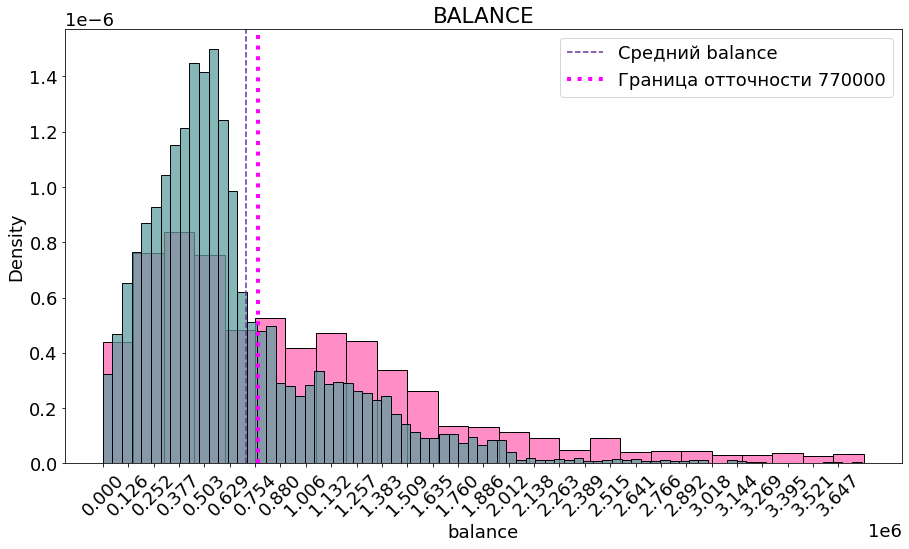

In [52]:
#гистограмма для баланса
plot_density_hist_churn(data, 'balance')

Больше клиентов с большими балансами(balance > 770 тысяч) уходят из банка. 

Первый пик по количеству клиентов, лежит левее, чем оставшихся клиентов, меньше денег на балансе лежит, в районе 250 тысяч, а у оставшихся в районе 600 тысяч.У отточных клиентов интересный второй пик в райнне 1.25 млн.Получаются два типа отточных клиентов - мало денег на балансе и много денег на балансе

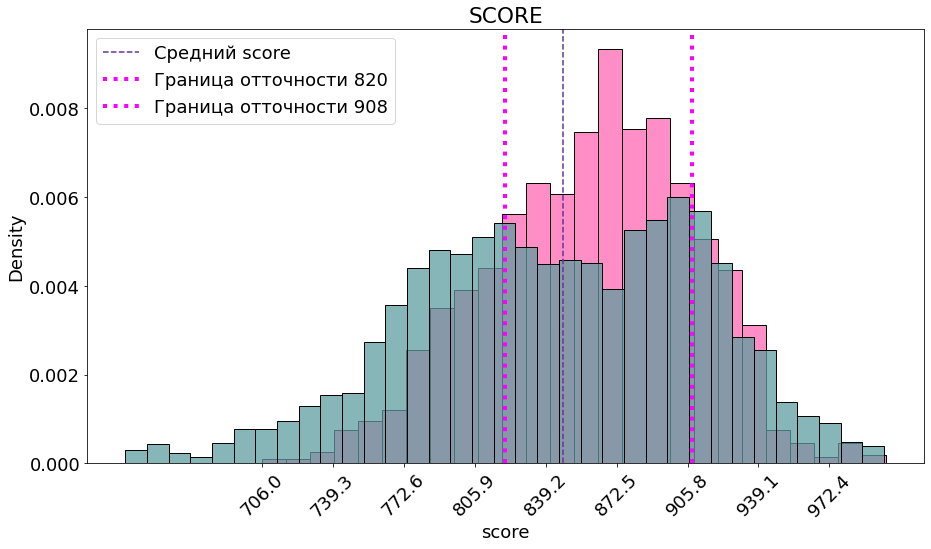

In [53]:
#гистограмма для score
plot_density_hist_churn(data, 'score')

Для отточных более характерны значения score от 820 до 908

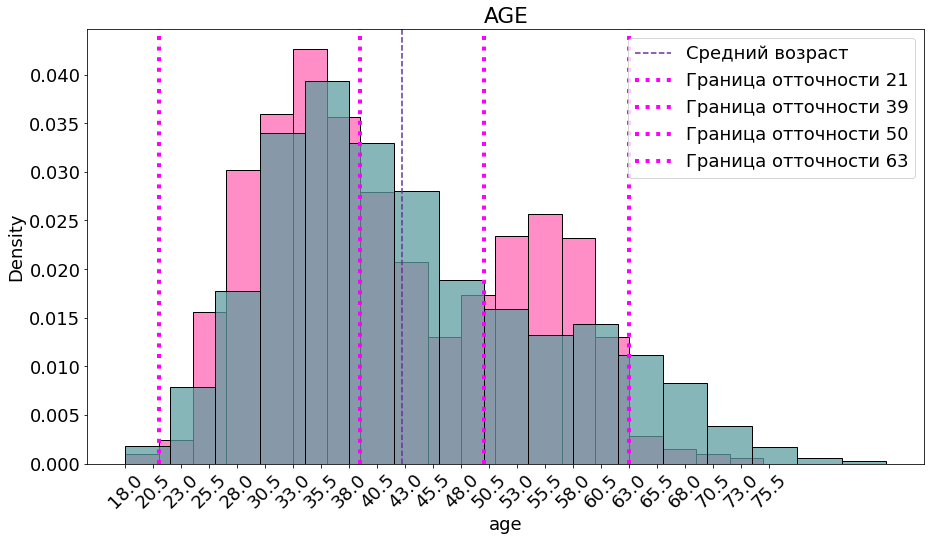

In [54]:
#гистограмма для age

data_churn = data.query('churn == 1')
data_not_churn = data.query('churn == 0')
plt.figure(figsize=(15,8))
plt.rcParams.update({'font.size': 18})
ax = sns.histplot(data_churn['age'],stat='density', common_norm=False, color='hotpink', binwidth=3)
sns.histplot(data_not_churn['age'],stat='density', common_norm=False, ax=ax,color='cadetblue', binwidth=4)
plt.axvline(x=data['age'].mean(), color='rebeccapurple', linestyle='--', label=f'Средний возраст')
ax.tick_params(axis='x', rotation=45)
plt.xticks(np.arange(data_churn['age'].min(), data_churn['age'].max()+1, data_churn['age'].max()/30));
plt.axvline(x=21, color='magenta', linestyle=':', linewidth=4, label=f'Граница отточности {21}')
plt.axvline(x=39, color='magenta', linestyle=':', linewidth=4, label=f'Граница отточности {39}')
plt.axvline(x=50, color='magenta', linestyle=':', linewidth=4, label=f'Граница отточности {50}')
plt.axvline(x=63, color='magenta', linestyle=':', linewidth=4, label=f'Граница отточности {63}')
plt.legend()
plt.title(label='age'.upper());

Для отточных есть две интересные группы по возрасту - 21 до 39, с 50 до 63 лет

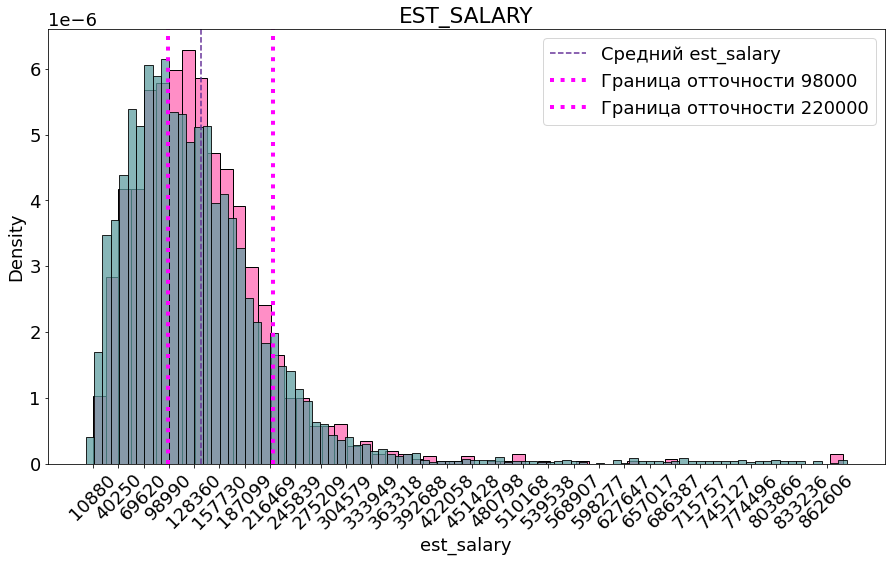

In [55]:
#гистограмма для est_salary
plot_density_hist_churn(data, 'est_salary')

При зарплате от 98 тысяч до 220 тысяч отточных клиентов больше.

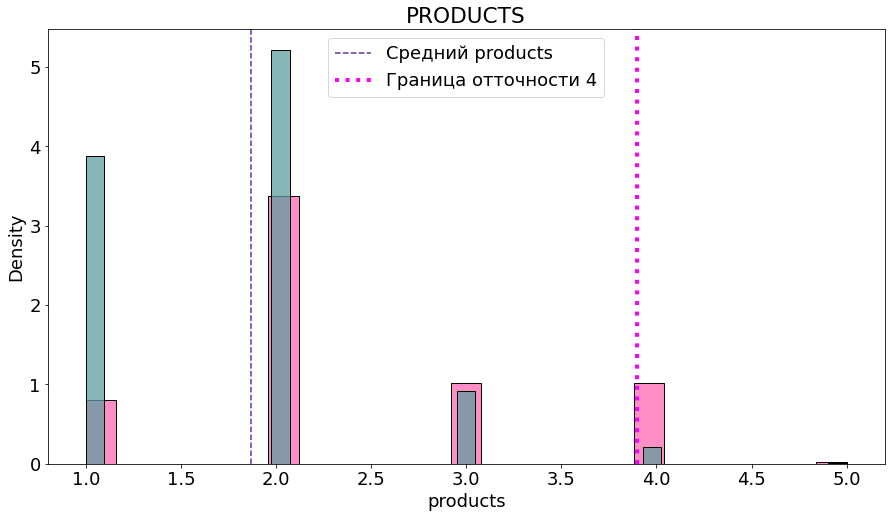

In [56]:
#гистограмма для products
plot_density_hist_churn(data, 'products', discrete=True)
plt.axvline(x=3.9, color='magenta', linestyle=':', linewidth=4, label=f'Граница отточности {4}')
plt.legend();

Для отточных очень характерно 4 продукта. И редко 0 и 1 продукта. 3 продукта практичесви не отличается от неотточных.

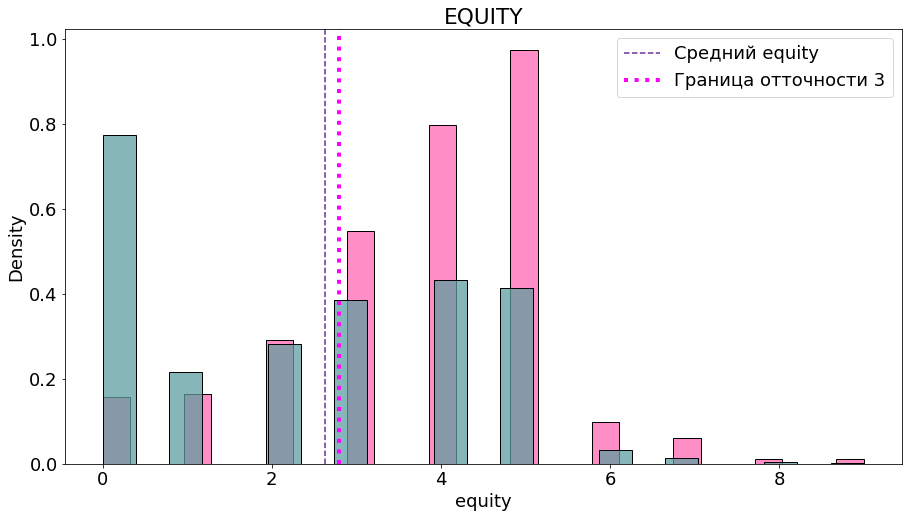

In [57]:
#гистограмма для equity
plot_density_hist_churn(data, 'equity', discrete=True)
plt.axvline(x=2.8, color='magenta', linestyle=':', linewidth=4, label=f'Граница отточности {3}')
plt.legend();

Для отточных клиентов более характерно, чем для оставшихся, более 3 баллов собственности

#### 3.2.2 Сводные таблицы для категориальных значений <a id='3.2.2'></a>

Для категориальных есть очень простой и действенный, а главное понятный и больше подходящий для презентации подход — можно делать сводные таблицы pivot_table с уровнем оттока по категориям (или сделать группировку по категории с последующей аггрегацией информации об оттоке) и из них столбиковые диаграммы со средним уровнем оттока по банку.

In [58]:
def plot_pivot_table_churn(data, column_name):
    
    table = pd.pivot_table(data, values=['churn'], index=[column_name],
                       aggfunc={'churn': "mean"}) 
    plt.rcParams.update({'font.size': 18})
    table.plot(kind='bar',color='cadetblue', alpha=0.8, figsize=(15,8))
    plt.axhline(y=data.churn.mean(), color='hotpink', linestyle='--', label=f'Средний отток по банку')
    plt.title(label=column_name.upper())
   
    plt.legend()

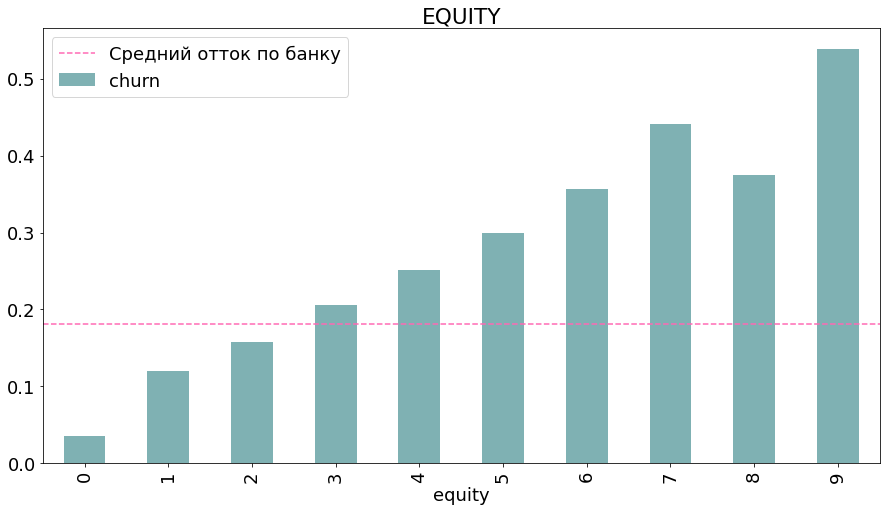

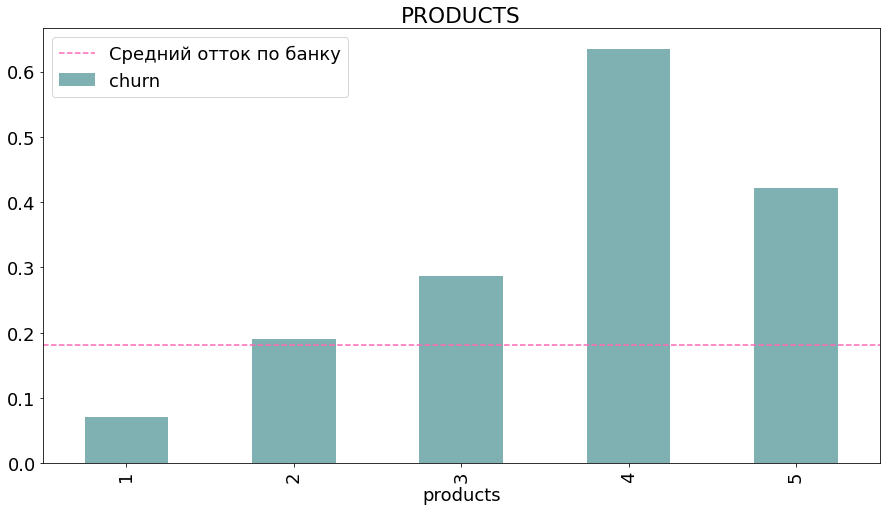

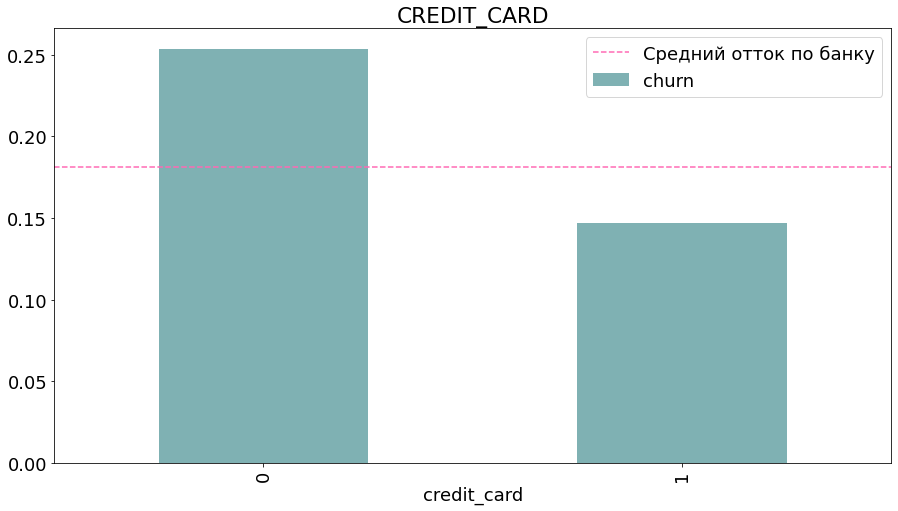

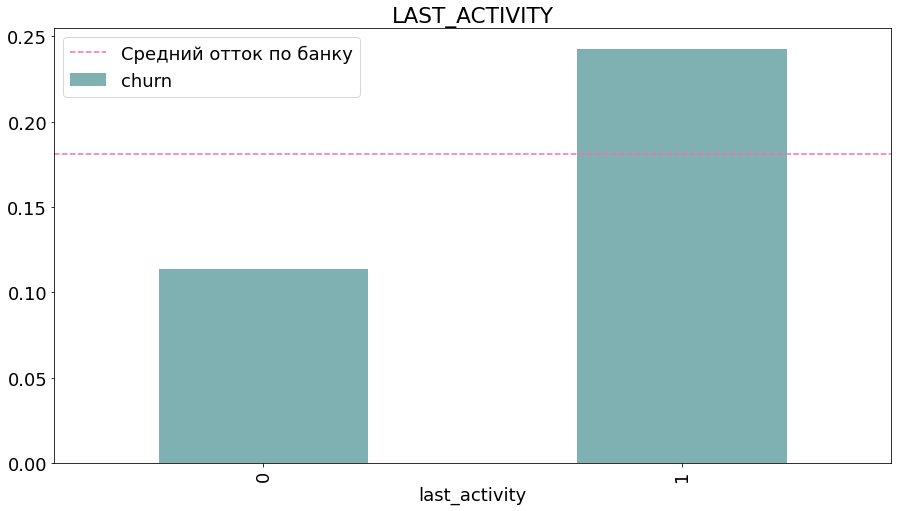

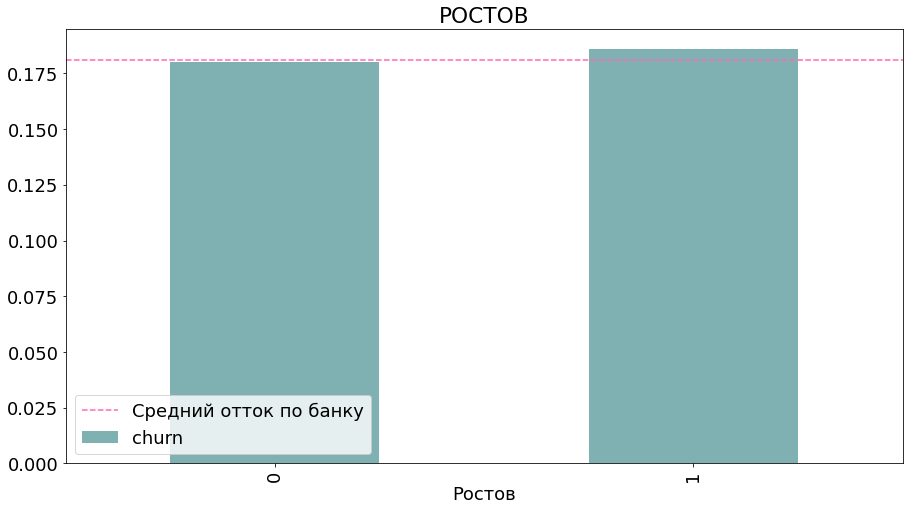

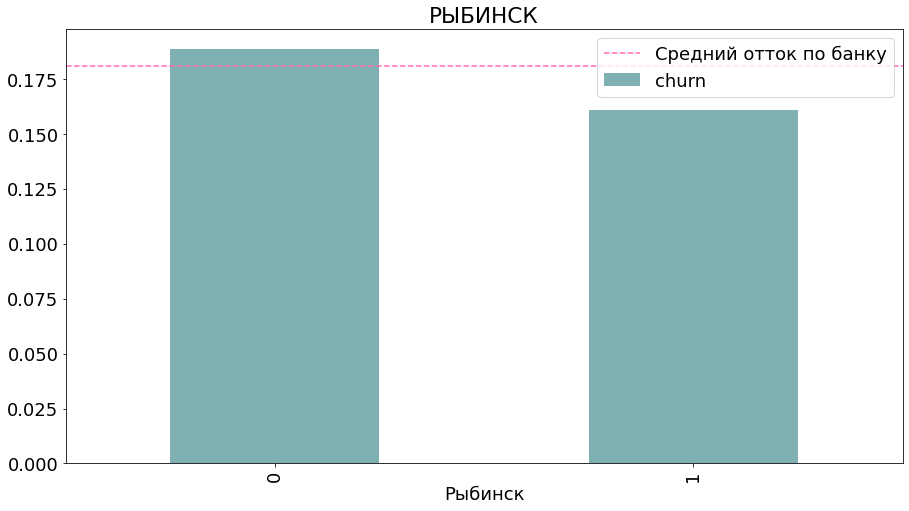

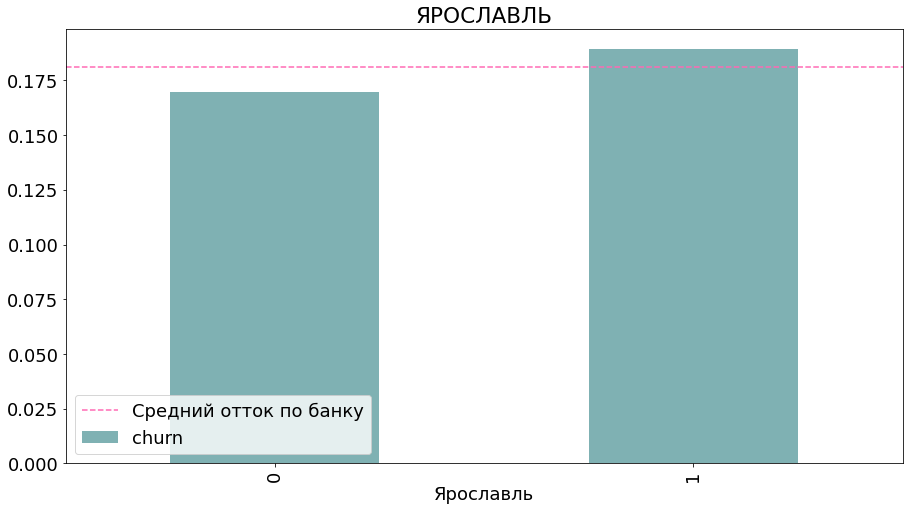

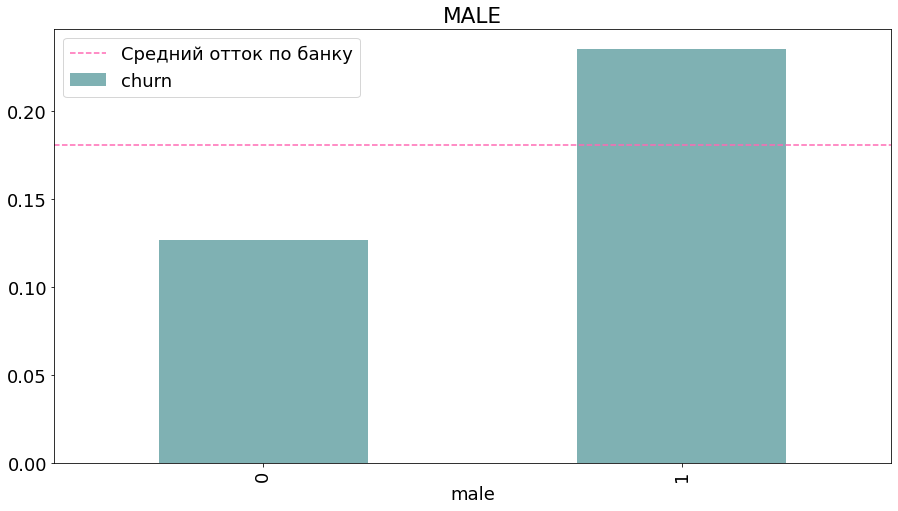

In [59]:
discrete_columns = ['equity', 'products', 'credit_card', 'last_activity',  'Ростов', 'Рыбинск', 'Ярославль', 'male']
for column in discrete_columns:    
    plot_pivot_table_churn(data, column)

У отточных клиентов

- чаще нет кредитной карты
- были активны
- пол мужской чаще, чем женский
- город практически не влияет

### 3.3 Проверка важности признаков модели с деревьями решений <a id='3.3'></a>

In [60]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [61]:
data.head()

userid  score       city gender   age  equity    balance  products  \
0  183012 850.00    Рыбинск      Ж 25.00       1   59214.82         2   
1  146556 861.00    Рыбинск      Ж 37.00       5  850594.33         3   
2  120722 892.00    Рыбинск      Ж 30.00       0  479307.38         1   
3  225363 866.00  Ярославль      Ж 51.00       5 1524746.26         2   
4  157978 730.00  Ярославль      М 34.00       5     174.00         1   

   credit_card  last_activity  est_salary  churn  nan_balance  Ростов  \
0            0              1    75719.14      1            0       0   
1            1              0    86621.77      0            0       0   
2            1              1   107683.34      0            1       0   
3            0              1   174423.53      1            0       0   
4            1              0    67353.16      1            0       0   

   Рыбинск  Ярославль  male     salary_category  
0        1          0     0   66370 min group 2  
1        1          0     0   83906 min group 3  
2        1          0     0  101297 min group 4  
3        0          1     0  161568 min group 7  
4        0          1     1   66370 min group 2

In [62]:
feature_columns = ['score',  'age', 'equity', 'products', 'credit_card', 'last_activity', 'est_salary', 'balance','Ростов', 'Рыбинск', 'Ярославль', 'male']
X = data[feature_columns]
y = data.churn

In [63]:
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [64]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

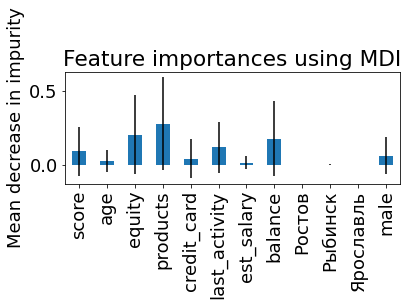

In [65]:
forest_importances = pd.Series(importances, index=feature_columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


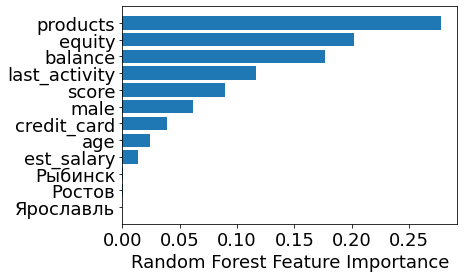

In [66]:
feature_columns_series = pd.Series(feature_columns)
sorted_idx = clf.feature_importances_.argsort()
plt.barh(feature_columns_series[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance");

In [67]:
rf_importances = pd.Series(data=clf.feature_importances_[sorted_idx], index=feature_columns_series[sorted_idx])
rf_importances_color = pd.DataFrame(abs(round(rf_importances,2)).sort_values(ascending=False)).style.background_gradient('coolwarm',low=0.75, high=1.0).format('{:,.2f}')
rf_importances_color

In [68]:
len(clf.estimators_)

100

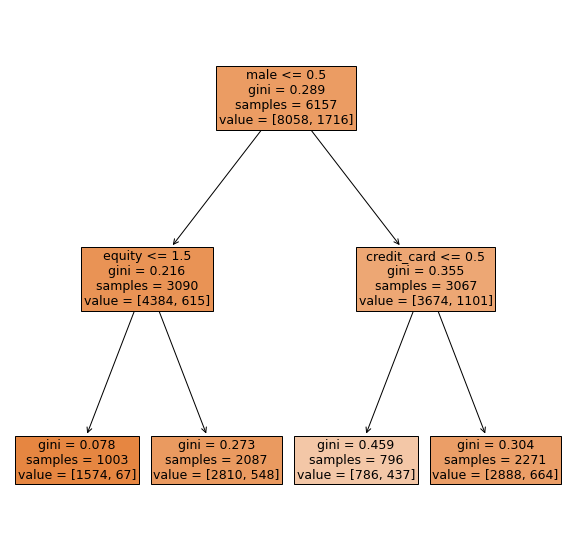

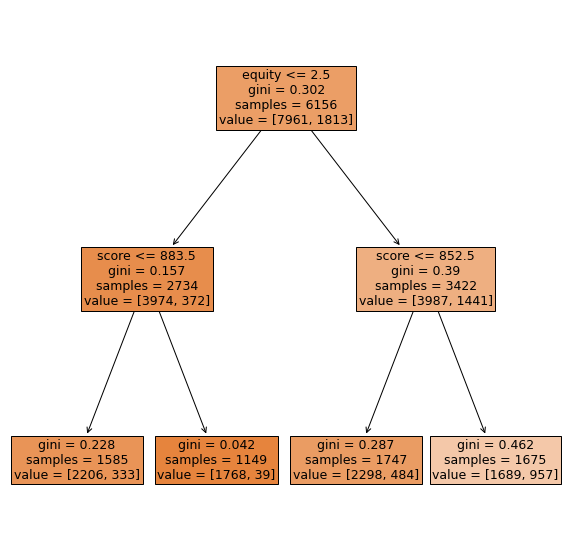

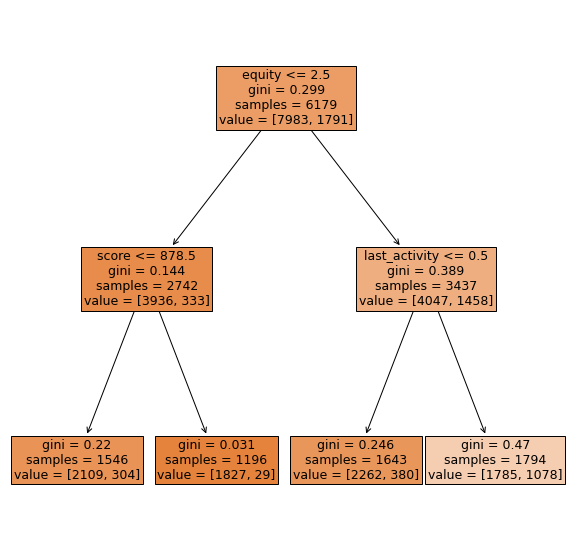

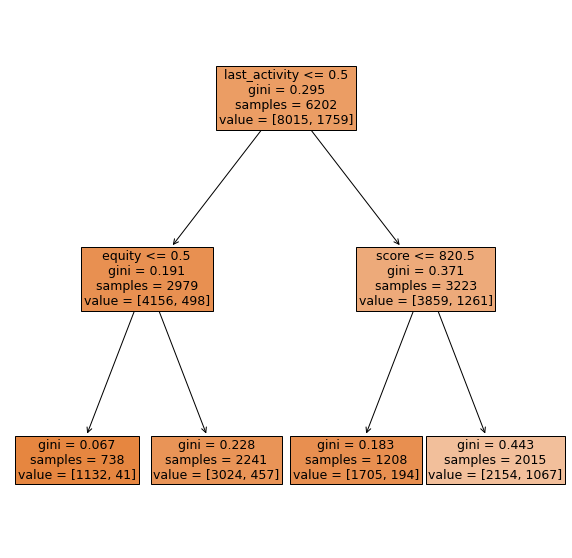

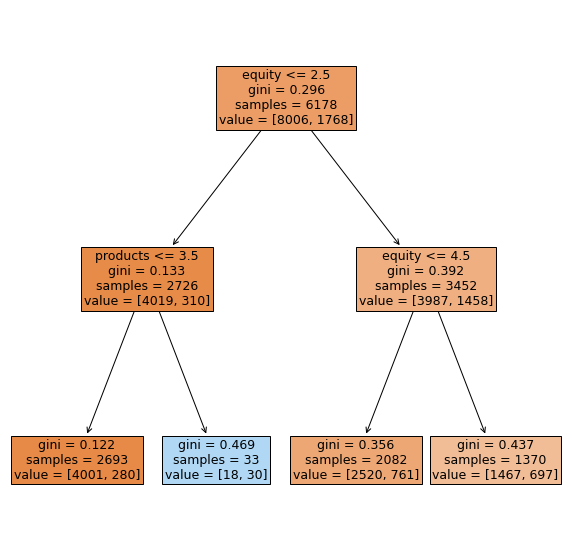

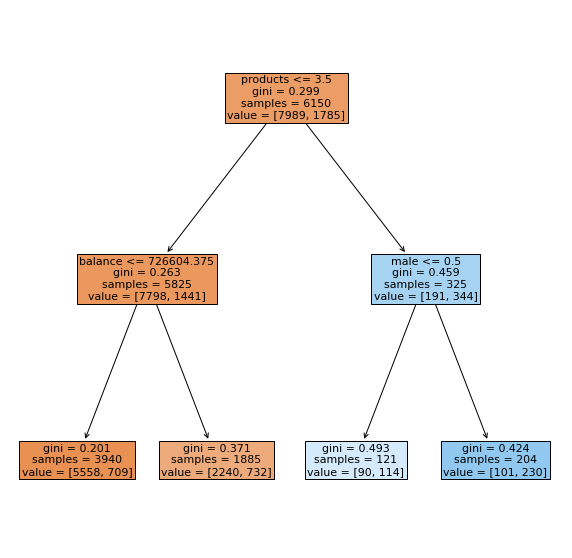

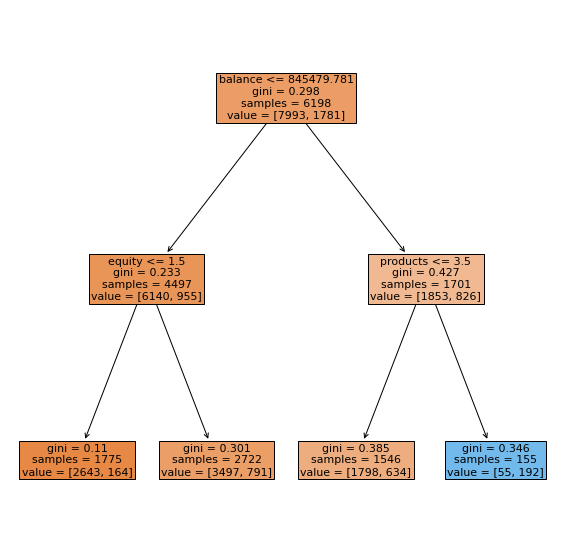

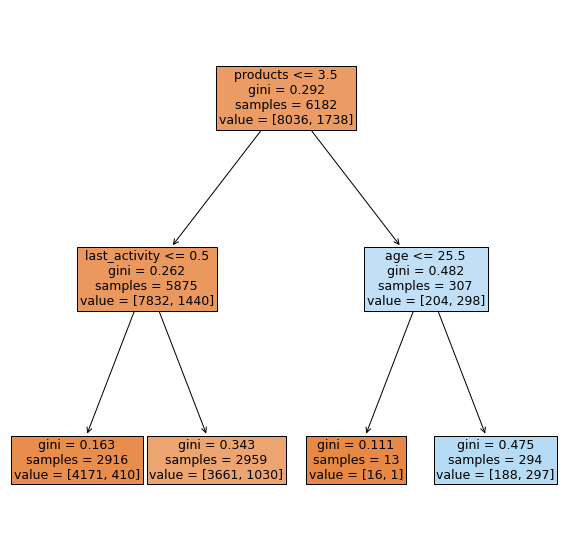

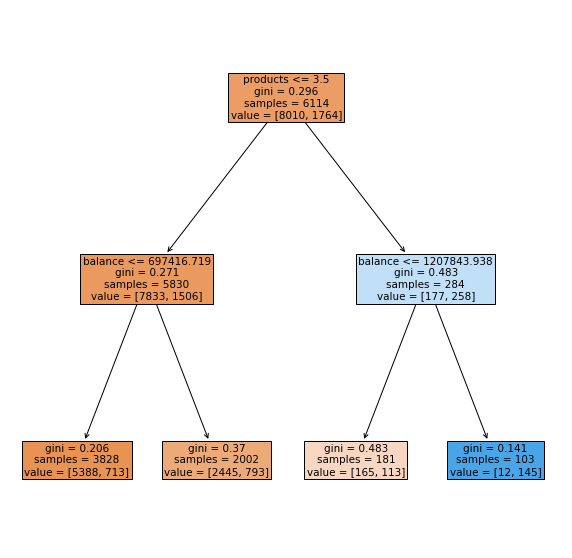

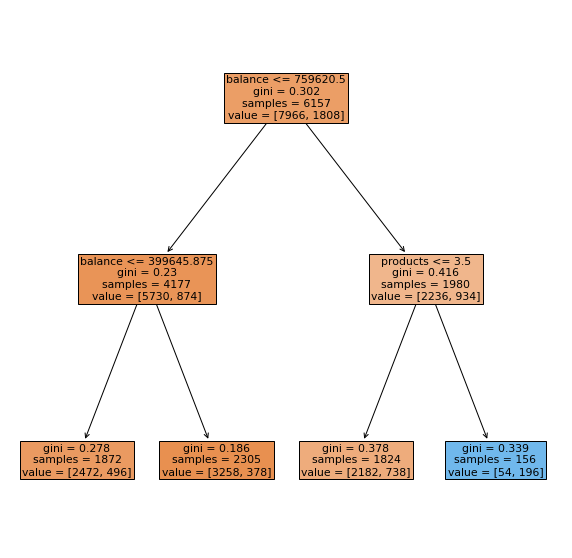

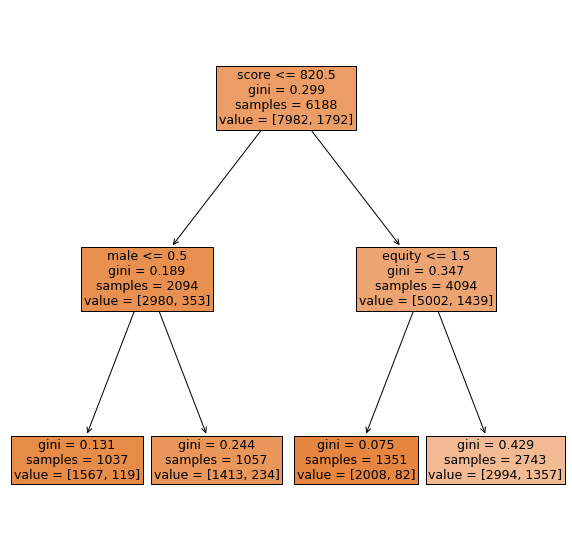

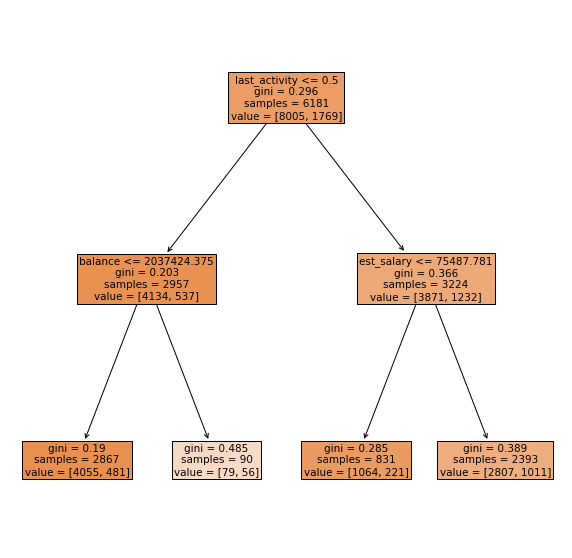

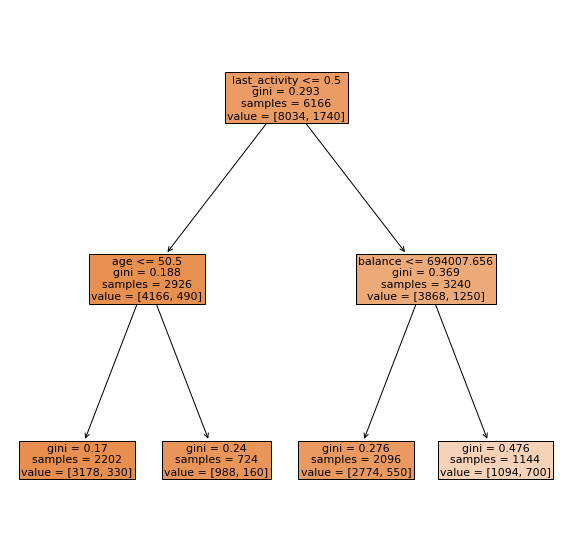

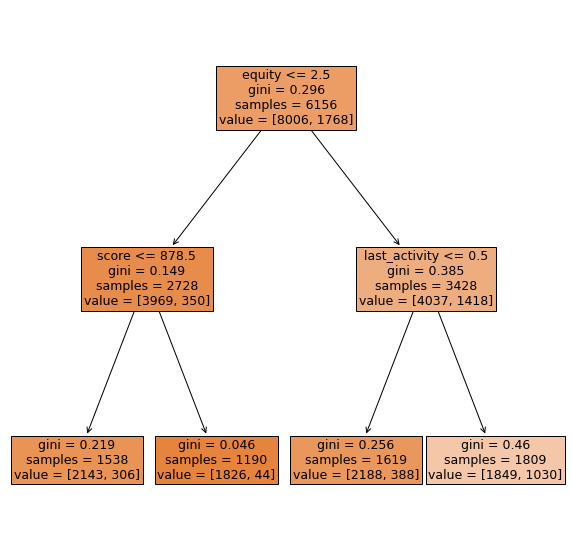

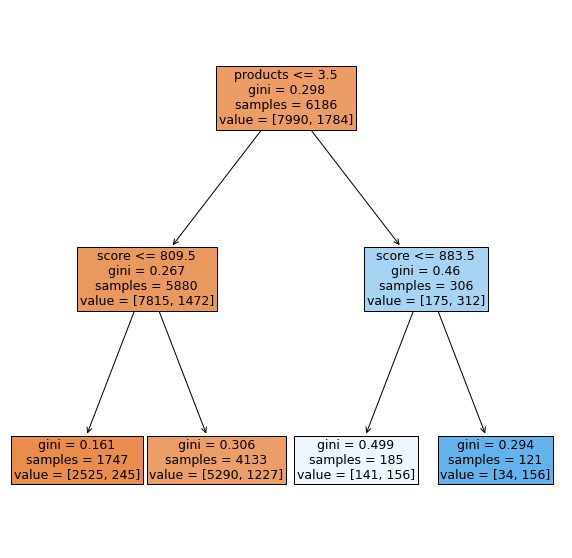

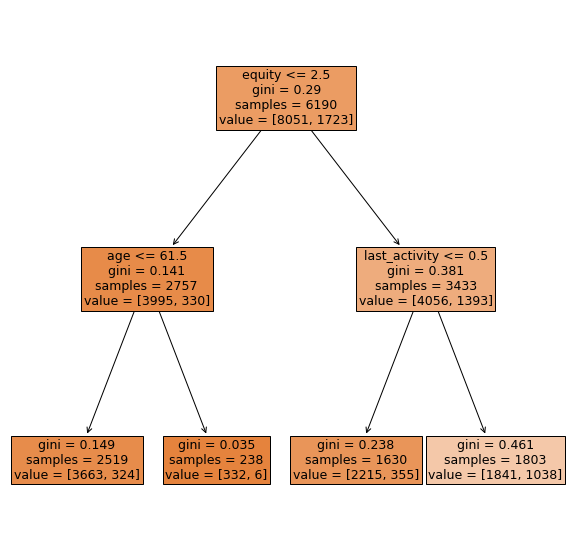

In [69]:
for i in range(0,len(clf.estimators_),6):
    plt.figure(figsize=(10,10))
    _ = tree.plot_tree(clf.estimators_[i], feature_names=X.columns, filled=True)

Интересные границы из графа

У отточных
- продуктов больше 3.5

- зарплата больше 89 тысячи

- score > 896 , 870

## Шаг 4. Проверка статистических гипотез <a id='4'></a>

### 4.1 Различаются ли доходы клиентов, которые ушли и которые остались <a id='4.1'></a>

#### t-тест для сравнения средних двух генеральных совокупностей <a id='4.1.1'></a>

Нулевая гипотеза - средние месячные доходы пользователей, которые ушли равны средним месячным доходам пользователей, которые остались.
Альтернативная гипотеза - ушедшие пользователи зарабатывают больше, чем оставшиеся

Для проверки гипотезы будем использовать t-тест для сравнения средних двух генеральных совокупностей.  Выборки разного размера, параметр equal_var возьмем False, так как возможно различие дисперсий у генеральных совокупностей.

In [70]:
def stat_test(data, group_column, target_column, alternative, test='t-test', alpha=0.05):
    """ Функция для проведения статистического теста
        test -  't-test', 'u-test'   
    """
    
    #создаем две тестовые группы
    group1_clients = data[data[group_column] == 1][target_column].values
    group2_clients = data[data[group_column] == 0][target_column].values
    
    if test == 't-test':
           
        #проводим t-тест для двух выборок, в качестве альтернативой используем правостороннюю гипотезу
        results = stats.ttest_ind(group1_clients, group2_clients,
                                   equal_var=False,
                                   alternative='greater')
        result = results.pvalue
             
    
    elif test == 'u-test':
        
        result = stats.mannwhitneyu(group1_clients, group2_clients)[1]
    
    #выведем значение p-value
    print(f'p-value: {result:.3f}')
   
    #выведем разницу средних
    print(f'разница средних: {(group1_clients.mean() / group2_clients.mean() - 1):.3f}')    

    #проверим p-value
    if result < alpha:
        print('отвергаем нулевую гипотезу')
    else:
        print('нет оснований отвергнуть нулевую гипотезу')

In [71]:
stat_test(data, 'churn', 'est_salary', 'greater', 't-test', alpha=0.05)

p-value: 0.388
разница средних: 0.005
нет оснований отвергнуть нулевую гипотезу


**Вывод:** доход ушедших статистически значимо не отличается от дохода оставшихся по t-тесту.

#### u-тест для сравнения средних двух генеральных совокупностей <a id='4.1.2'></a>

Нулевая гипотеза - средние месячные доходы пользователей, которые ушли равны средним месячным доходам пользователей, которые остались. Альтернативная гипотеза - ушедшие пользователи зарабатывают больше, чем оставшиеся

Для проверки гипотезы будем использовать u-тест для сравнения средних двух генеральных совокупностей.

In [72]:
stat_test(data, 'churn', 'est_salary', 'greater', 'u-test', alpha=0.05)

p-value: 0.001
разница средних: 0.005
отвергаем нулевую гипотезу


#### сравнение результатов t-test и u-test <a id='4.1.3'></a>

<AxesSubplot:ylabel='Frequency'>

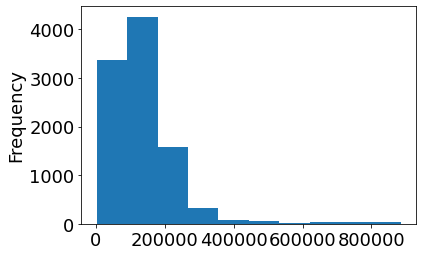

In [73]:
data.est_salary.plot(kind='hist')

U-критерий Манна-Уитни непараметрический тест, не чувствителен к выбросам

t-test  параметрический тест, чувствителен к выбросам

По t-тесту нет статистически значимых различия в средней зарплате групп по оттоку, а по u-тесту ушедшие пользователи зарабатывают больше, чем оставшиеся.
Разница в средних зарплат по группам всего 1.7%. Кажется, что это слишком малая разница и t-тест показывает результат ближе к истине. С другой стороны, возможно сильное влияние выбросов, и u-тест дает верную оценку, несмотря на небольшую разницу в средних. Из гистограмм тоже заметно, что есть зависмость с зарплатой. 

### 4.2 Проверка статистической разницы долей z-критерием <a id='4.2'></a>

Нулевая гипотеза: доли ушедших пользователей в двух группах равны
Альтернативная гипотеза: доли ушедших пользователей в двух группах не равны

Функция для проверки статистической гипотезы

In [74]:
def z_test(data, group_column, target_column, alpha=0.05):
    """
    data - исходный датафрейм
    group_column - колонка, по которой разбивают на две группы
    target_column - признак, по которому исследуют доли
    alpha - уровень статистической значимости
    
    Проверка на достоверность различий в долях 
    
    Нулевая гипотеза: доли ушедших пользователей в двух группах равны
    Альтернативная гипотеза: доли ушедших пользователей в двух группах не равны
    """
    
    def generate_samples(data, group_column, target_column):
        """
        event_name - название события
        group -  id группы


        Возвращает две выборки в виде двух np.array, где - 
                             индекс 0 - число пользователей c target_column==1
                             индекс 1 - сколько всего пользователей в group_column
        """                    

        data_A = data[data[group_column]==1]
        data_B = data[data[group_column]==0]

        all_users_A =  data_A.shape[0]
        target_users_A = data_A[data_A[target_column] == 1].shape[0]

        all_users_B =  data_B.shape[0]
        target_users_B = data_B[data_B[target_column] == 1].shape[0]

        sample_A  =np.array([target_users_A , all_users_A ])

        sample_B  =np.array([target_users_B , all_users_B])
        return sample_A, sample_B 

    sampleA,sampleB   =  generate_samples(data, group_column, target_column)
   

    # пропорция успехов в первой группе:
    p1 = sampleA[0]/sampleA[1]

    # пропорция успехов во второй группе:
    p2 = sampleB[0]/sampleB[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (sampleA[0] + sampleB[0]) / (sampleA[1] + sampleB[1])

    # разница пропорций в датасетах
    difference = p1 - p2 
    
    print(f'разница пропорций в датасетах:  {difference:.3f}')
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/sampleA[1] + 1/sampleB[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = stats.norm(0, 1)  
    
    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print(f'p-значение:  {p_value:.3f}')

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        ) 


Сравним доли отточных для городов, предыдущие методы, то показывали, то не показывал связь городов и оттока

In [75]:
#discrete_columns = ['credit_card', 'last_activity',  'Ростов', 'Рыбинск', 'Ярославль', 'male','female']
discrete_columns = ['Ростов', 'Рыбинск', 'Ярославль']
for test_column in discrete_columns:
    print(test_column.upper())
    z_test(data, test_column,'churn', alpha=0.05)

РОСТОВ
разница пропорций в датасетах:  0.006
p-значение:  0.611
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
РЫБИНСК
разница пропорций в датасетах:  -0.028
p-значение:  0.002
Отвергаем нулевую гипотезу: между долями есть значимая разница
ЯРОСЛАВЛЬ
разница пропорций в датасетах:  0.020
p-значение:  0.013
Отвергаем нулевую гипотезу: между долями есть значимая разница


Для Рыбинска и Ярославля есть значимая разница в долях отточных, для Ростова такой разницы нет.

### 4.3 тест хи-квадрат на независимость переменных <a id='4.3'></a>

In [76]:
def chi_test(data, column_1, column_2, alpha=0.05):
    """ Функция для проведения тест хи-квадрат на независимость переменных 
    """
    
    #создаем кросстаблицу
    df = pd.crosstab(data[column_2],data[column_1])
    
    #проводим тест
    result = stats.chi2_contingency(df)[1]
    
    #выведем значение p-value
    print(f'p-value: {result:.3f}')
    

    #проверим p-value
    if result < alpha:
        print('отвергаем нулевую гипотезу')
    else:
        print('нет оснований отвергнуть нулевую гипотезу')

In [77]:
chi_test(data,'churn','city', alpha=0.05)

p-value: 0.006
отвергаем нулевую гипотезу


**Вывод** Есть зависимость оттока и города.

In [78]:
### КОД РЕВЬЮЕРА

stats.chi2_contingency(pd.crosstab(data['city'],data['churn']))[1]

0.00640508000648409

### Промежуточные выводы

[Таблица влияния характеристик на отток]( https://paper.dropbox.com/doc/--CCzpUfQZv8w2uwznFfceGj5JAQ-PZE7HN5i4VFjJsVYD2KeT ) 

|               | RandomForest | Корреляция  коэффициент PhiK | Корреляция коэффициент Пирсона | Сравнение портретов | t-tets | u-test | z-test | chi-test |
| ------------- | ------------ | ---------------------------- | ------------------------------ | ------------------- | ------ | ------ | ------ | -------- |
| products      | 1            | 3                            | 1                              | 6                   |        |        |        |          |
| equity        | 2            | 1                            | 2                              | 1                   |        |        |        |          |
| balance       | 3            | 2                            | 3                              | 3                   |        |        |        |          |
| last_activity | 4            | 4                            | 4                              | 2                   |        |        |        |          |
| score         | 5            | 5                            | -                              | -                   |        |        |        |          |
| male          | 6            | 6                            | 5                              | 4                   |        |        |        |          |
| credit_card   | 7            | 7                            | 6                              | 5                   |        |        |        |          |
| est_salary    | 8            | -                            | -                              | 8                   | -      | +      |        |          |
| age           | 9            | 8                            | -                              | -                   |        |        |        |          |
| Ярославль     | -            | -                            | -                              | -                   |        |        | +      | +        |
| Рыбинск       | -            | -                            | -                              | 7                   |        |        | +      | +        |
| Ростов        | -            | -                            | -                              | -                   |        |        | -      | +        |



В таблице сведены все полученные результаты анализа для всех характеристик вместе. Приоритет признакам раставлен от 1 (для самых значимых признаков). Для сравнения портретов и корреляций, если разница была <10%, то у признак отбрасываем из рассмотрения. Для RandomForest отбрасывали признаки, если их важность равнялась 0. Признаки отсортированы по значимости параметров для RandomForest. Сравнение портретов пользователей самый неточный метод. Корреляция с коэффициентом Пирсона не учитывает нелинейные связи, с коэффициентом phiK - учитывает. Для определения связи зарплаты с оттоком следует больше доверяьть результатам u-test. Для городов есть связь с оттоком, но мы не будем их учитывать, так как большинство методов показаоло, что эта сязь очень слабая.

|               | Процент по отточным клиентам | Процент по всем клиентам |
| ------------- | ---------------------------- | ------------------------ |
| products      | 17                           | 3                        |
| equity        | 80                           | 14                       |
| last_activity | 70                           | 12                       |
| balance       | 50                           | 9                        |
| score         | 16                           | 3                        |
| male          | 65                           | 12                       |
| credit_card   | 45                           | 8                        |
| age 1         | 49                           | 9                        |
| age 2         | 26                           | 5                        |
| est_salary    | 47                           | 8                        |



In [79]:
"""
#сохранила из excel csv - для презентации
tbl =  pd.read_csv(f'datasets/table_percent.csv', index_col = 0)  
plt.figure(figsize=(15,8))
sns.heatmap(tbl.sort_values(by='Процент по отточным клиентам', ascending=False), annot=True, fmt=".0f", cmap='vlag', center=50);
"""

'\n#сохранила из excel csv - для презентации\ntbl =  pd.read_csv(f\'datasets/table_percent.csv\', index_col = 0)  \nplt.figure(figsize=(15,8))\nsns.heatmap(tbl.sort_values(by=\'Процент по отточным клиентам\', ascending=False), annot=True, fmt=".0f", cmap=\'vlag\', center=50);\n'

#### products

По деревьям и коэффициентам корреляции наиболее сильная связь с количеством продуктов. Для отточных не бывает 0 продуктов и выделяется группа клиентов с 3 и более продуктами.

In [80]:
(data.query('churn == 1 and products > 3').shape[0] / data.query('churn == 1').shape[0]) *100

16.732617297908423

In [81]:
(data.query('churn == 1 and products > 3').shape[0] / data.shape[0]) *100

3.0284428074483323

Клиенты с более чем 3 продуктами составляют 17% всех отточных клиентов и почти 3% среди всех пользователей

#### equity

Количество баллов собственности второй по значимости параметр для деревьев и двух корреляций. По портретам важнее для мужчин. Значения >=3 балла

In [82]:
(data.query('churn == 1 and equity > 2').shape[0] / data.query('churn == 1').shape[0]) *100

80.38439796495194

In [83]:
(data.query('churn == 1 and equity > 2').shape[0] / data.shape[0]) *100

14.548802946593002

Клиенты с более чем 2 баллми собственноcти составляют почти 80% всех отточных клиентов  и 14% среди всех пользователей

#### last_activity

Последняя активность третий признак по значимости для деревьев, также первый признак для женского профиля и второй для мужского. По корреляциям четвертый, баланс более значим. значение - 1, клиент был активен

In [84]:
(data.query('churn == 1 and last_activity == 1').shape[0] / data.query('churn == 1').shape[0]) *100

69.98304126625212

In [85]:
(data.query('churn == 1 and last_activity == 1').shape[0] / data.shape[0]) *100

12.666257417638633

Активные клиенты составляют 70% всех отточных клиентов и 12% среди всех клиентов
Параметр last_activity, связан с оттоком, если клиент был активен, last_activity=1.

#### balance

Важность баланса подтвердили все подходы - RandomForest, сравнение портретов и мужского, и женского, корреляция - Пирсона, PhiK. Баланс больше 780 тысяч характерен для отточных клиентов.

In [86]:
(data.query('churn == 1 and balance > 770000').shape[0] / data.query('churn == 1').shape[0]) *100

49.689089881288865

In [87]:
(data.query('churn == 1 and balance > 770000').shape[0] / data.shape[0]) *100

8.993247391037446

Клиенты с балансом >780 тысяч составляют 50% всех отточных клиентов  и 9% среди всех пользователей

#### score

Важность score подтвердили только подходы - RandomForest  и корреляция с коэффициентом PhiK, эти подходы находят нелинейные связи. Сравнение портретов и корреляции с коэффициентом Пирсона не нашли взаимосвязи кредитного рейтинга и оттока. Интересный интервал - 820 до 908

In [88]:
#процентная доля среди отточных пользователей
(data.query('churn == 1 and 820 < score > 908').shape[0] / data.query('churn == 1').shape[0]) *100

16.39344262295082

In [89]:
#процентная доля среди всех пользователей
(data.query('churn == 1 and 820 < score > 908').shape[0] / data.shape[0]) *100

2.9670554532432987

Клиенты с рейтингом от 820 до 908 оставляют 16.4% всех отточных клиентов и 3 % среди всех

#### male

Важность пола подтвердили все подходы. Отточный клиент, чаще мужчина, значение - 1

In [90]:
#процентная доля среди отточных пользователей
(data.query('churn == 1 and male == 1').shape[0] / data.query('churn == 1').shape[0]) *100

64.7823629169022

In [91]:
#процентная доля среди всех пользователей
(data.query('churn == 1 and  male == 1').shape[0] / data.shape[0]) *100

11.72498465316145

Мужчины составляют 64.3% всех отточных клиентов и 11.4 % среди всех

#### credit_card

Важность кредитной карты подтвердили все подходы, но особенно важна она оказалась для женщин. У отточного клиента нет кредитной карты - 0

In [92]:
#процентная доля среди отточных пользователей
(data.query('churn == 1 and credit_card == 0').shape[0] / data.query('churn == 1').shape[0]) *100

44.657998869417746

In [93]:
#процентная доля среди всех пользователей
(data.query('churn == 1 and credit_card == 0').shape[0] / data.shape[0]) *100

8.08266830366278

Клиенты без кредитной карты составляют 43.7% всех отточных клиентов и 7.8 % среди всех

#### age

Важность пола подтвердили только подходы - RandomForest  и корреляция с коэффициентом PhiK, которые находят нелинейные связи. Интересные интервалы - 21-39 и 50-63

In [94]:
#процентная доля среди отточных пользователей - интервал 21-39
print('процентная доля среди отточных пользователей:',(data.query('churn == 1 and 21<age<39').shape[0] / data.query('churn == 1').shape[0]) *100)
#процентная доля среди всех пользователей
print('процентная доля среди всех пользователей:', (data.query('churn == 1 and 21<age<39').shape[0] / data.shape[0]) *100)

процентная доля среди отточных пользователей: 48.50197851893726
процентная доля среди всех пользователей: 8.778391651319827


In [95]:
#процентная доля среди отточных пользователей - интервал 50-63
print('процентная доля среди отточных пользователей:',(data.query('churn == 1 and 50<age<63').shape[0] / data.query('churn == 1').shape[0]) *100)
#процентная доля среди всех пользователей
print('процентная доля среди всех пользователей:', (data.query('churn == 1 and 50<age<63').shape[0] / data.shape[0]) *100)

процентная доля среди отточных пользователей: 25.551158846806103
процентная доля среди всех пользователей: 4.6245140167792105


Клиенты от 21 года до 39 лет составляют 49% всех отточных и 8% от всех клиентов

Клиенты от 50 до 63 лет составляют 26% всех отточных и 5% от всех клиентов

#### est_salary

Важность est_salary подтвердил только подход - RandomForest.  Интересные интервал из гистограмм - 108 тысяч - 210 тысяч

In [96]:
#процентная доля среди отточных пользователей
(data.query('churn == 1 and (108000 < est_salary< 210000)').shape[0] / data.query('churn == 1').shape[0]) *100

46.749576031656304

In [97]:
#процентная доля среди всех пользователей
(data.query('churn == 1 and (108000 < est_salary< 210000)').shape[0] / data.shape[0]) *100

8.461223654593821

Клиенты c зарплатами 108 тысяч - 210 тысяч cоставляют 47% всех отточных клиентов и 8.4 % среди всех

#### Рыбинск, Ростов, Ярославль

Важность городов не подтведилась подходами.  Но статистические тесты z-test и chi-test нашли связь для Рыбинска и Ярославля, для Ростова связи нет. Не будем учитывать признак города при сегментации.

## Шаг 5. Сегментация пользователей <a id='5'></a>

   - тепловые карты по два признака отточности(цвет - churn)
   - таблица для приоритизации
     - 5 сегментов
     - столбцы - размер кластера, отток в кластере, ценность клиентов для бизнеса
   - критерии приоритизации:
     - от 100-500 до 1500 клиентов в кластере
     - отток в 2 раза больше, чем в среднем по банку
     - 3 итоговых с максимальным покрытием по клиентам  

Список критериев

- products >= 3
- equity > 2
- last_activity == 1
- balance > 780000
- 820 < score > 908
- male == 1
- credit_card == 0
- 21<age<39 
- 50<age<63
- 98000 < est_salary< 220000



In [98]:
# рекомендуемый уровень оттока в сегменте
data.churn.mean()*2

0.3619807652956824

In [99]:
#сегмент 1
data.query('balance > 780000 and male == 1').agg({"churn":"mean", "userid":"count", "products":"mean", "balance":"mean"})

churn            0.36
userid        1584.00
products         2.01
balance    1406312.75
dtype: float64

Большое покрытие, ценнные клиенты - большой баланс

In [100]:
#сегмент 2
data.query('last_activity == 1 and equity > 2 and credit_card == 0').agg({"churn":"mean", "userid":"count", "products":"mean", "balance":"mean"})

churn           0.45
userid       1161.00
products        2.36
balance    923631.14
dtype: float64

Большое покрытие, высокий отток

In [101]:
#сегмент 3
data.query('50<age<63  and balance > 780000' ).agg({"churn":"mean", "userid":"count", "products":"mean", "balance":"mean"})

churn            0.37
userid         647.00
products         2.14
balance    1404533.59
dtype: float64

In [102]:
#сегмент 4
data.query('products > 3').agg({"churn":"mean", "userid":"count", "products":"mean", "balance":"mean"})

churn            0.63
userid         473.00
products         4.04
balance    1049077.92
dtype: float64

Очень высокий отток, ценные клиенты

In [103]:
#сегмент 5
data.query('equity > 2 and male == 1 and 98000 < est_salary< 220000').agg({"churn":"mean", "userid":"count", "products":"mean", "balance":"mean"})

churn           0.39
userid       1345.00
products        2.12
balance    944274.19
dtype: float64

In [104]:
#сегмент 5
data.query('50<age<63 and equity > 2' ).agg({"churn":"mean", "userid":"count", "products":"mean", "balance":"mean"})

churn           0.34
userid       1021.00
products        2.16
balance    972128.61
dtype: float64

In [105]:
#сегмент 6
data.query('21<age<39 and balance > 780000 and last_activity == 1').agg({"churn":"mean", "userid":"count", "products":"mean", "balance":"mean"})

churn            0.50
userid         600.00
products         2.09
balance    1327734.21
dtype: float64

Высокий отток, ценные клиенты - большой баланс

**Выводы :**
остановимся на сегменте 1, сегменте 2, сегменте 4 и сегменте 6

## Шаг 6. Выводы, рекомендации  <a id='6'></a>

In [107]:
#средний баланс клиентов банка
data.balance.mean()

708993.9284352411

**1 сегмент Мужчины с большим балансом (>800 тысяч)**
- охват - 1585
- отток - 0.36
- ценность высокая 
   - 1.4 млн средний баланс (по банку средний баланс - 675 тысяч)
   - в среднем 2 продукта

Предложить вклады 


**2 сегмент Нет кредитки, есть собственность (больше 2 баллов) и недавно были активны**
- охват - 1161
- отток - 0.45
- ценность средняя -  тысячи средний баланс
                   - 2.36 продукта на пользователя

Предложить кредитную карту на выгодных условиях 

**3 сегмент Высокоотточные пользователи многих продуктов**
 - отват - 473
 - отток - 0.63
 - ценность высокая 
   - 1.05 млн средний баланс
   - 4.04 продукта на пользователя

Клиентам было бы интересно объединить комиссии на продукты банка.

**4 сегмент Высокоотточные молодые пользователи(21 до 39) с большим балансом и недавно были активны** 
 - отват - 591
 - отток - 0.51
 - ценность высокая 
   - 1.33 млн средний баланс
   - 2.10 продукта на пользователя
   
Можно предложить выгодные вклады с линейной связью процентной ставки с возрастом клиентам до 40 лет.

## Шаг 7. Презентация менеджеру отдела маркетинга <a id='7'></a>

[Презентация]( https://drive.google.com/file/d/1RcQZiZo3s7gzhEVVQqO87nwqmLwvOldV/view?usp=sharing )